# Исследование объявлений о продаже квартир

## Введение

### Краткое описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Цель проекта
Провести исследовательский анализ данных и установить параметры, влияющие на цену объектов недвижимости.

### Описание данных

Исходные данные представлены в виде csv-файла со следующими столбцами:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### План работы над проектом
1. Открытие файла с данными, изучение общей информации 
2. Предобработка данных
3. Добавление в таблицу новых столбцов
4. Исследовательский анализ данных
5. Общий вывод по проекту

## Основная часть

### Открытие файла с данными, изучение общей информации

In [1]:
# Импортируем библиотеку pandas для открытия и изучения исходных данных.
# Cохраним исходные данные в переменную data. 
import pandas as pd
import numpy as np
import requests
import re
import math
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('real_estate_data.csv')
except:
    data = pd.read_csv('https://_______real_estate_data.csv')

# Выведем первые 5 строк для обзора данных.
data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные скреились в одну строку. Применим разделитель \t 

In [2]:
# Импортируем библиотеку pandas для открытия и изучения исходных данных. Применим разделитель \t
# Cохраним исходные данные в переменную data

import pandas as pd
try:
    data = pd.read_csv('real_estate_data.csv', sep="\t")
except:
    data = pd.read_csv('https://______real_estate_data.csv', sep="\t")
    
# Выведем на экран 20 первых строк таблицы, изучим их
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# выведем основную информацию о количестве значений и типе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Изучим описание числовых данных датафрейма
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В датафрейме 23 699 строки, 22 колонки. Пропущенные значения имеются в 14 колонках:

* ceiling_height (высота потолка), 
* floors_total (количество этажей в доме),
* living_area (жилая площадь),
* kitchen_area (площадь кухни),
* is_apartment (указание на аппартаменты), 
* balcony (число балконов),
* locality_name (название населенного пункта), 
* airports_nearest (растояние до близайшего аэропорта),
* cityCenters_nearest (расстояние до центра города),
* parks_around3000 (число парков в радиусе 3 км),
* parks_nearest (расстояние до ближайшего парка),
* ponds_around3000 (число водоёмов в радиусе 3 км),
* ponds_nearest (расстояние до ближайшего водоёма)
* days_exposition (сколько дней было размещено объявление - от публикации до снятия)

Нужно исправить тип данных в нескольких колонках:

В колонке first_day_exposition данные имеют тип object. Для удобства работы с этими данными нужно будет преобразовать их в тип datetime.

Данные  floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - перевести в тип int, потому что не может быть дробное число этажей, балконов или парков. 

Данные last_price также стоит перевести в int, потому что столбец содержит не дробные числа.

Данные в is_apartment нужно пеервести в тип bool, т.к. они имеют два значения True и False. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

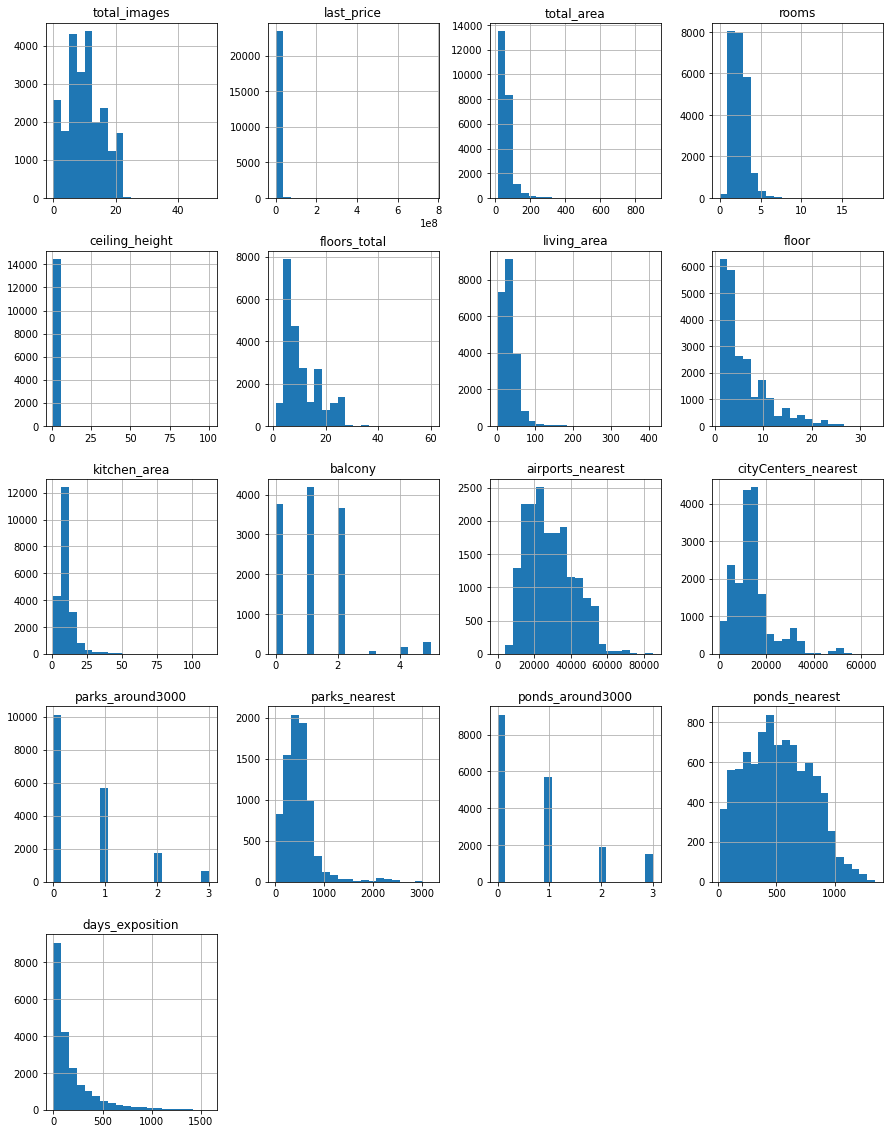

In [5]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике методом hist.
# по умолчанию метод hist строит гистограммы шириной в 10 корзин (bins).
# Мы укажем ширину в 20 корзин для большей детализации.

data.hist(bins=20, grid=True, figsize=(15, 20))

На гистограммах мы видим как часто в наборе данных встречается то или иное значение.
* На графике total_images мы видим, что чаще всего в объявлениях имеется около 7-8 или 16-17 фотографий.
* На графике last_price видим, что в большинстве объявлений указана цена до 1 млн рублей. На это стоит обратить внимание - уж очень низкая цена. Можно предположить, что большинство объявлений касаются недвижимости в отдаленных районах, без балконов, маленькой площади. Либо есть какая-то аномалия в данных.
* График total_area показывает, что большинство объявлений касаются квартир общей площадью до 50 кв.м.
* График rooms говорит — большинство объявлений продают недвижимость из 2-3 комнат.
* Согласно графику ceiling_height в большинстве объявлений указана стандартная высота потолков. Но встречаются аномальные значения, например потолки высотой 25 метров. Нужно исправить или удалить эти аномалии.
* График floors_total демонстрирует: большинство объявлений касаются домов 5-6 этажей. Имеется небольшое количество объявлений о высотках в 25 и 30 этажей - можно было бы предположить, что это ошибки в данных. Но интернет-поиск позволяет узнать, что в Санкт-Петербурге есть жилые дома высотой до 37 этажей https://spbhomes.ru/science/civilizaciya-na-neve-studii-v-dome-biznes-klassa/
* График living_area говорит, что в большинстве объявлений указана жилая площадь в 40-50 кв.м.
* График floor показывает: большинство продающейся недвижимости располагается на 2-3 этажах
* Согласно графикам kitchen_area площадь кухни в большинстве объявлений - 5-10 кв.м.
* График balcony: Большинство квартир в продаже (более 4000) - с 1 балконом, еще примерно 3800 объектов - не имеют балкона, еще примерно 3700 объектов - с 2 балконами.
* Графики airports_nearest и cityCenters_nearest депонстрируют, что большинство продающихся объектов расположены в 22 км от аэропорта и в 16-17 км от центра города. Здесь пока не совсем понятно - в таблице указано расстояние до центра Санкт-Петербурга или центра какого-то другого города (например, районного центра).
* Согласно графикам parks_around3000 и parks_nearest — большинство квартир не имеют парка в радиусе 3 км, а те квартиры, которые имеют, находятся примерно в 500-600 м от него.
* Согласно графикам ponds_around3000 и ponds_nearest большинство объектов не имеют водоема в радиусе 3 км, а те объекты, которые имеют, находятся примерно в 400 метрах от него.
* По графику days_exposition предварительно можно сказать, что большинство объявлений до продажи висят висят на ресурсе не более 100 дней.  

### Предобработка данных

#### Обработка дубликатов, исправление заголовков

In [6]:
# Переименуем столбцы, которые не соответствуют правилам заголовков

data = data.rename( 
     columns={
         'cityCenters_nearest': 'city_centers_nearest',
         'parks_around3000': 'parks_around_3000',
         'ponds_around3000': 'ponds_around_3000', 
 }
)

In [7]:
# Напечатаем заголовки датафрейма списком, чтобы проверить исправились ли заголовки
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

Заголовки столбцов исправлены

In [8]:
# проверим, что в датафрейме нет полностью одинаковых строк (строк дубликатов)
data.duplicated().sum()

0

Явные и неявные дубликаты могут быть в столбце с названиями населенных пунктов. Напечатаем и изучим значения из колонки locality_name


In [9]:
# Узнаем количество уникальных значений в колонке locality_name

data['locality_name'].nunique()

364

In [10]:
# Напечатаем уникальные значения в столбце locality_name

data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

В колонке locality_name встречаются разные написания одних и тех же населенных пунктов: 
поселок Тельмана и посёлок Тельмана, 
посёлок городского типа Токсово и поселок городского типа Токсово,
поселок городского типа Рябово и поселок Рябово, 
поселок станции Вещево и посёлок при железнодорожной станции Вещево,
посёлок Мурино и Мурино.

Изменим значения в столбце так, чтобы осталисть только названия поселений, без упоминания их административно-территориального статуса (поселок, село, деревня и т.д.).  

In [11]:
# все статусы поселений заменяем на "пустое место". Буквы "ё" меняем на "е" для единообразия.

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ', 'городской посёлок ', 'поселок городского типа ', 'посёлок городского типа ', 'коттеджный поселок ', 'коттеджный посёлок ', 'посёлок станции ', 'поселок станции ', 'поселок при железнодорожной станции ', 'посёлок при железнодорожной станции ', 'поселок Пансионат ', 'посёлок Пансионат ', 'садоводческое некоммерческое товарищество ', 'садоводческое товарищество ', 'садовое товарищество ', 'деревня ', 'село ', 'посёлок ', 'поселок '], '', regex=True)
)

data['locality_name'].nunique()

305

In [12]:
# Проверим уникальные значения в столбце locality_name

data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'Шушары',
 'Янино-1',
 'Парголово',
 'Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'Кудрово',
 'Коммунар',
 'Колпино',
 'Красный Бор',
 'Гатчина',
 'Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'Новое Девяткино',
 'Металлострой',
 'Лебяжье',
 'Сиверский',
 'Молодцово',
 'Кузьмоловский',
 'Новая Ропша',
 'Павловск',
 'Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'Куттузи',
 'Аннино',
 'Ефимовский',
 'Плодовое',
 'Заклинье',
 'Торковичи',
 'Первомайское',
 'Красное Село',
 'Понтонный',
 'Сясьстрой',
 'Старая',
 'Лесколово',
 'Новый Свет',
 'Сланцы',
 'Путилово',
 'Ивангород',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'Оржицы',
 'Кальтино',
 'Романовка',
 'Бугры',
 'Рощино',
 'Кириши',
 'Луга',
 'Волосово',
 'Отрадное',
 'Павлово',
 'Оредеж',
 'Копорье',
 'Молодежное',
 'Тихвин',
 'Победа',
 'Нурма',
 'Синявино',
 'Тосно',
 'Стрельна',
 'Бокситогорск',
 'Александровская',
 'Лопухинка'

После удаления неявных дубликатов в колонке locality_name вместо 364 уникальных значений, стало 305.

In [13]:
# Округлим числовые данные в стоолцах

data['total_area'] = round(data['total_area'])
data['total_area']

0        108.0
1         40.0
2         56.0
3        159.0
4        100.0
         ...  
23694    134.0
23695     59.0
23696     57.0
23697     77.0
23698     32.0
Name: total_area, Length: 23699, dtype: float64

In [14]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.0,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.0,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.0,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,72.0,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.0,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Для удобства дальнейших расчетов округлим общую площадь квартир, жилую площадь и площадь кухонь.


In [15]:
# округлим площади жилья в датафрейте
data['total_area'] = round(data['total_area'])
data['kitchen_area'] = round(data['kitchen_area'])
data['living_area'] = round(data['living_area'])

# округлим также и цену квартир
data['living_area'] = round(data['living_area'])

# округлим высоту потолков до 1 цифры после запятой
data['ceiling_height'] = round(data['ceiling_height'], 1)

data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.0,2018-12-04T00:00:00,1,NaN,11.0,19.0,1,NaN,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.0,4,NaN,...,8.0,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.0,2018-09-10T00:00:00,1,NaN,12.0,14.0,5,NaN,...,9.0,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.0,2017-11-02T00:00:00,1,NaN,26.0,11.0,6,NaN,...,14.0,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,72.0,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,19.0,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.0,2018-05-23T00:00:00,1,NaN,27.0,15.0,26,NaN,...,9.0,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,44.0,7,NaN,...,6.0,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Поиск и изучение пропущенных значений в столбцах

In [16]:
# Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения. Рассмотрим каждый столбец в отдельности, чтобы понять можно ли заполнить пропуски.

##### Столбец rooms, studio и open_plan — число комнат , указание на студию и открытую планировку.

Прошущенных значений в этих колонках нет. Но их тоже нужно внимательно изучить.

In [17]:
 # посмотрим уникальные значения rooms
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [18]:
# изучим объекты больее 6 комнат
data.loc[data['rooms'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
648,3,17500000.0,184.0,2018-07-01T00:00:00,11,3.4,7.0,139.0,7,NaN,...,13.0,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
660,3,49950000.0,484.0,2017-10-04T00:00:00,7,3.2,6.0,312.0,4,NaN,...,26.0,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
681,20,24900000.0,249.0,2015-08-13T00:00:00,7,NaN,5.0,180.0,4,NaN,...,NaN,1.0,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0
750,9,29500000.0,189.0,2017-03-04T00:00:00,7,2.7,2.0,119.0,1,NaN,...,10.0,0.0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,20,22000000.0,141.0,2019-01-24T00:00:00,7,NaN,5.0,84.0,2,NaN,...,25.0,NaN,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90.0
22420,12,25000000.0,196.0,2016-11-04T00:00:00,7,3.5,6.0,145.0,5,NaN,...,17.0,1.0,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,NaN,NaN
22649,18,22900000.0,206.0,2016-04-04T00:00:00,7,NaN,6.0,142.0,2,NaN,...,16.0,0.0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,75.0
23400,17,30000000.0,213.0,2017-09-28T00:00:00,7,3.4,5.0,151.0,5,NaN,...,31.0,NaN,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0


В колонке rooms виден большой разброс комнат: от 0 - будем считать это студиями, до 19. 

Значения больше 6 комнат выглядят аномально большими. Вероятно это пентхаусы большой площади или коттеджи в несколько этажей. 

Удалять аномально большие значения не будем. Но нужно обратить на них внимание.

In [19]:
 # смотрим кол-во комнат в студии
data.groupby('studio')['rooms'].describe()

,count,mean,std,min,25%,50%,75%,max
studio,,,,,,,,
False,23550.0,2.083270,1.069811,0.0,1.0,2.0,3.0,19.0
True,149.0,0.073826,0.262369,0.0,0.0,0.0,0.0,1.0


Видим, что в студиях указано 0 комнат и 1 комната. Для единообразия будем считать, что студия - это 0 комнат.  Посмотрим в скольки студиях указана 1 комната и укажем с них 0 комнат.

In [20]:
data.loc[(data['open_plan'] != True)&(data['studio'] == True)]['total_area'].median()

26.0

In [21]:
data.loc[(data['open_plan'] == True)&(data['studio'] != True)]['total_area'].median()

27.0

In [22]:
# Посмотрим в скольки студиях указана 1 комната
data.loc[(data['studio'] == True)&(data['rooms'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.0,2016-06-07T00:00:00,1,NaN,12.0,17.0,8,False,...,NaN,2.0,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.0,2016-05-17T00:00:00,1,NaN,14.0,18.0,8,False,...,NaN,2.0,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.0,2016-04-25T00:00:00,1,2.8,10.0,21.0,10,False,...,NaN,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
8683,10,3500000.0,32.0,2016-05-05T00:00:00,1,3.0,23.0,30.0,11,False,...,NaN,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
11026,1,2800000.0,28.0,2016-05-04T00:00:00,1,NaN,26.0,19.0,6,False,...,NaN,2.0,Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12935,10,2200000.0,31.0,2016-05-15T00:00:00,1,2.5,8.0,22.0,5,False,...,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0
15142,2,2700000.0,30.0,2016-05-10T00:00:00,1,NaN,21.0,26.0,6,False,...,NaN,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0
18732,4,2400000.0,22.0,2016-05-06T00:00:00,1,NaN,10.0,15.0,6,NaN,...,NaN,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20086,0,1550000.0,22.0,2016-05-11T00:00:00,1,2.7,15.0,11.0,14,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21702,9,2349000.0,23.0,2016-05-19T00:00:00,1,2.7,20.0,16.0,8,False,...,NaN,1.0,Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0


In [23]:
# Заменяем 1 комнату в студиях на 0 комнат.
data.loc[data['studio'] == True, 'rooms'] = 0

In [24]:
# Проверяем остались ли студии с указанием 1 комнаты
data.loc[(data['studio'] == True)&(data['rooms'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [25]:
 # смотрим кол-во комнат в квартирах открытой планировки
data.groupby('open_plan')['rooms'].describe()

,count,mean,std,min,25%,50%,75%,max
open_plan,,,,,,,,
False,23632.0,2.075195,1.075291,0.0,1.0,2.0,3.0,19.0
True,67.0,0.298507,0.953700,0.0,0.0,0.0,0.0,5.0


Видим, что у открытой планировки указывали от 0 до 5 комнат. 

В чем отличие студии от квартиры открытой планировки? 

Квартиры со свободной планировкой - это фактически студии, но их площадь может быть сопоставима с трех- или четырехкомнатной квартирой. Свободная планировка — это пространство с минимальным количеством внутренних перегородок.

Посмотрим действительно ли отличается площадь у студий и свободных планировок.

In [26]:
# кол-во объектов открытой планировки, с 0 комнат, и не студии
data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.0,2017-03-28T00:00:00,0,NaN,26.0,24.0,19,NaN,...,NaN,1.0,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.0,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,NaN,1.0,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.0,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,24.0,2018-02-01T00:00:00,0,NaN,4.0,10.0,3,NaN,...,NaN,1.0,Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.0,2018-02-01T00:00:00,0,NaN,18.0,19.0,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.0,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.0,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [27]:
# медианная общая площадь объектов открытой планировки, с 0 комнат, и не студии
data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] == 0)]['total_area'].median()

26.0

In [28]:
# кол-во объектов открытой планировки, больше 0 комнат, и не студии
data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] != 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1379,3,6000000.0,44.0,2015-11-10T00:00:00,1,NaN,25.0,17.0,23,False,...,NaN,1.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231.0
5668,9,3550000.0,37.0,2016-04-25T00:00:00,1,2.8,16.0,18.0,2,False,...,NaN,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61.0
8861,13,5500000.0,64.0,2015-11-13T00:00:00,3,3.0,5.0,48.0,2,False,...,NaN,0.0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229.0
9063,6,3800000.0,39.0,2016-05-19T00:00:00,1,NaN,17.0,30.0,1,False,...,NaN,0.0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45.0
12760,0,3350000.0,51.0,2015-01-22T00:00:00,2,2.5,12.0,30.0,10,NaN,...,NaN,2.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521.0
14017,13,3990000.0,59.0,2016-03-29T00:00:00,3,2.5,9.0,38.0,3,False,...,NaN,1.0,Колпино,27820.0,33606.0,0.0,NaN,1.0,705.0,81.0
17783,3,48763000.0,157.0,2016-04-01T00:00:00,5,NaN,11.0,NaN,5,NaN,...,NaN,0.0,Санкт-Петербург,28399.0,7101.0,2.0,290.0,3.0,221.0,90.0
19796,1,12000000.0,97.0,2016-04-05T00:00:00,4,3.4,5.0,71.0,2,False,...,NaN,0.0,Санкт-Петербург,24559.0,4811.0,0.0,NaN,0.0,NaN,89.0


In [29]:
# медианная общая площадь объектов открытой планировки, больше 0 комнат, и не студии
data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] != 0)]['total_area'].median()

55.0

Действительно есть у свободных планировок с числом указанных комнат от 1 и более медианная площадь = 55 кв. м.
У свободных планировок, в которых владелец указал 0 комнат медианная площадь = 26,4 км.в. (хотя в их число попала например квартира площадь 371 кв.м).

Считаем, что для единообразия нужно для квартир свободной планировки в колонке rooms проставить нули. Потому, что фактически это такие же студии, но большей планировки. В студии и в свободной планировке количество комнат при желании можно регулировать на свое усмотрение. 

In [30]:
# проставим нули в количестве комнат квартир свободной планировки

data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] != 0), 'rooms'] = 0

In [31]:
# проверим ослались ли еще не измененные строки

data.loc[(data['open_plan'] == True) & (data['studio'] == False) & (data['rooms'] != 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


##### Столбец ceiling_height — высота потолков

In [32]:
# в столбце ceiling_height 9195 пропущенных значений.
# Рассмотрим какие уникальные значения в нем есть 
data['ceiling_height'].sort_values().unique()

array([  1. ,   1.2,   1.8,   2. ,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.2,   5.3,   5.5,
         5.6,   5.8,   6. ,   8. ,   8.3,  10.3,  14. ,  20. ,  22.6,
        24. ,  25. ,  26. ,  27. ,  27.5,  32. , 100. ,   nan])

В столбце ceiling_height выявлено несколько проблем:
1. пропущены цифры сотых кв.м.
2. встречается аномально малая (1, 1.2, 1.7) и аномально большая высота потолков (14, 20, 25 и т.д.).
3. есть пропущенные значения 

Аномально малая и большая высота потолка вероятно указана владельцами по ошибке. Потолки меньше 2 метров маловероятны (в хрущевках высота не менее 2.4 м). 
В пентхаусах высота потолков вероятно может достигать 10 метров (https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov). Но все что более этой цифры - вызывает сомнения. Вероятно в некоторых случаях неверно поставлена точка - наприпер, потолок не 24 метра, а 2.4 метра.  

Для приведения к реальности значения 20 и более метров разделим на 10. Затем удалим из датафрейма строки с высотой потолка менее 2 метров и более 10 м.

In [33]:
#делим на 10 потолки более 20 метров

selected_ceilings = data.loc[data['ceiling_height'] >= 10]
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = selected_ceilings['ceiling_height'] / 10

# смотрим изменились ли строки
data.loc[[355, 3148, 4643]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.0,2018-07-12T00:00:00,2,2.5,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,3.2,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,2.5,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0


In [34]:
# Узнаем сколько объектов имеют потолки меньше 2 и более 10 метров
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 10)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5,1500000.0,43.0,2017-08-14T00:00:00,2,1.2,2.0,28.0,1,NaN,...,5.0,NaN,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000.0,56.0,2018-05-11T00:00:00,2,14.0,14.0,32.0,5,NaN,...,9.0,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.8,37.0,17.0,5,NaN,...,8.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,16.0,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.0,12.0,32.0,7,NaN,...,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [35]:
# узнаем какую долю от всего датафрейма составляют объекты с потолками ниже 2м и более 10м
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 10)]['ceiling_height'].count()/data['ceiling_height'].count()

0.00034473248758963045

Объекты с потолками ниже 2 м и более 10м составляют менее 1% от общей выборки (28 строк). Их удаление не повлияет на точность расчетов. 

In [36]:
 # удаляем строки с потолками менее 2 метров и более 10 метров
#data = data.loc[(data['ceiling_height'] < 2) & (data['ceiling_height'] > 10)]

data.drop(data.loc[data['ceiling_height'] < 2].index, inplace=True)
data.drop(data.loc[data['ceiling_height'] > 10].index, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23694 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23694 non-null  int64  
 1   last_price            23694 non-null  float64
 2   total_area            23694 non-null  float64
 3   first_day_exposition  23694 non-null  object 
 4   rooms                 23694 non-null  int64  
 5   ceiling_height        14499 non-null  float64
 6   floors_total          23608 non-null  float64
 7   living_area           21791 non-null  float64
 8   floor                 23694 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23694 non-null  bool   
 11  open_plan             23694 non-null  bool   
 12  kitchen_area          21417 non-null  float64
 13  balcony               12179 non-null  float64
 14  locality_name         23645 non-null  object 
 15  airports_nearest   

In [37]:
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.2 ,  2.26,  2.3 ,  2.4 ,  2.5 ,  2.6 ,  2.7 ,  2.75,
        2.8 ,  2.9 ,  3.  ,  3.1 ,  3.2 ,  3.3 ,  3.4 ,  3.5 ,  3.6 ,
        3.7 ,  3.8 ,  3.9 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,
        4.6 ,  4.7 ,  4.8 ,  4.9 ,  5.  ,  5.2 ,  5.3 ,  5.5 ,  5.6 ,
        5.8 ,  6.  ,  8.  ,  8.3 , 10.  ,   nan])

Займемся пропущенными значениями.

In [38]:
# смотрим строки с пропущенными значениями
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.0,2018-12-04T00:00:00,1,NaN,11.0,19.0,1,NaN,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.0,4,NaN,...,8.0,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.0,2018-09-10T00:00:00,1,NaN,12.0,14.0,5,NaN,...,9.0,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.0,2017-11-02T00:00:00,1,NaN,26.0,11.0,6,NaN,...,14.0,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,18.0,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.0,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [39]:
# На высоту потолков сильнее всего влияет этаж, на котором располагается продающийся объект. 
# На последнем этаже может располагаться пентхаус с более высоким потолком, чем на нижних этажах.
# Заменим пропущенные значения медианными значениями соответствующими этажам квартир.    

for t in data['floor'].unique():
    data.loc[(data['floor'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floor'] == t), 'ceiling_height'].median()

data['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


4

In [40]:
# проверяем, что пропуски в высоте потолков, которые были в строках 1,2,3 заполнились медианными значениями
data.loc[[1, 2, 3]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.0,2018-12-04T00:00:00,1,2.6,11.0,19.0,1,NaN,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.6,5.0,34.0,4,NaN,...,8.0,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.6,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0


In [41]:
# Четыре пропуска не заменились медианными значениями.
# Напечатаем эти строки, изучим их
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.0,28,NaN,...,19.0,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
18218,4,9900000.0,101.0,2018-09-27T00:00:00,3,NaN,35.0,53.0,33,NaN,...,14.0,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0
18629,20,5700000.0,54.0,2017-12-08T00:00:00,1,NaN,35.0,21.0,31,NaN,...,18.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0


In [42]:
# Квартиры с пропусками в высоте потолков располагабтся на 28, 31, 32 и 33 этажах.
# Посмотрим сколько в датафрейме объектов расположенных на этих этажах.

data['floor'].value_counts().sort_values()

31       1
30       1
32       1
29       1
28       1
33       1
27      10
26      24
25      46
24      63
23     100
20     110
22     113
21     125
19     147
18     178
17     227
16     315
14     337
15     342
13     379
11     523
12     526
10     687
9     1051
8     1083
7     1217
6     1305
5     2619
4     2804
1     2916
3     3073
2     3368
Name: floor, dtype: int64

На 28, 31, 32 и 33 этажах расположено по одной продающейся квартире. Поэтому на предыдущем шаге цикл не смог найти медиану по одному значению.
Заполним оставшиеся пропуски медианными значениями в соответствии с площадью квартир.

In [43]:
for t in data['total_area'].unique():
    data.loc[(data['total_area'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['total_area'] == t), 'ceiling_height'].median()

In [44]:
# проверим, что высота потолков в оставшихся 4 строках заполнена

data.loc[[397, 11575, 18218, 18629]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.6,36.0,21.0,28,NaN,...,19.0,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,2.8,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
18218,4,9900000.0,101.0,2018-09-27T00:00:00,3,2.8,35.0,53.0,33,NaN,...,14.0,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0
18629,20,5700000.0,54.0,2017-12-08T00:00:00,1,2.6,35.0,21.0,31,NaN,...,18.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0


In [45]:
data['ceiling_height'].isna().sum()

0

Все пропуски в колонке ceiling_height заменены.

##### Столбец floors_total — количество этажей в доме 

In [46]:
# посмотрим медианные значения по этому столбцу
data['floors_total'].describe()

count    23608.000000
mean        10.672653
std          6.595272
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [47]:
# посмотрим уникальные значения по этому столбцу
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [48]:
# В столбце есть аномально высокие здания, выше 35 этажа, посмотрим на них
data.query('floors_total > 35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.6,36.0,21.0,28,NaN,...,19.0,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,46.0,2018-06-28T00:00:00,2,2.9,60.0,27.0,4,NaN,...,7.0,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.7,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.7,36.0,40.0,29,NaN,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.6,52.0,10.0,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [50]:
# посмотрим общее количество пропусков в стобце floors_total и какую долю они составляют от общего объема данных.
# Если меньше 1%, то удалим строки с пропущенными данными floors_total

data['floors_total'].isna().sum()

86

In [51]:
# узнаем какую долю от всего датафрейма составляют объекты с пропусками floors_total
data['floors_total'].isna().sum()/data['floors_total'].count()

0.003642832937987123

In [52]:
# Пропуски floors_total составляют меньше 1%, удаляем их.
data.drop(data.loc[data['floors_total'].isna()].index, inplace=True)

# проверяем, что пропуски floors_total исчезли
data['floors_total'].isna().sum()

0

In [53]:
# посмотрим как изменились медианные значения floors_total после заполнения пропусков 

data['floors_total'].describe()

count    23608.000000
mean        10.672653
std          6.595272
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Возможно заполнять пропуски floors_total медианным значением по каждому типу из столбца floor не очень логично.
Но медианные данные по столбцу в целом не изменились.
Незначительно скорректировалось среднее значение по столбцу (mean - на 0,01), и стандартное отклонение (std 0,001).
Оставим данные в таком виде. 

##### Столбец living_area  и kitchen_area — жилая площадь и площадь кухни

In [54]:
# Проверим есть ли квартиры,где сумма жилой площади и кухни превышает общую площадь 
data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2600000.0,30.0,2018-02-14T00:00:00,1,2.6,9.0,26.0,5,NaN,...,6.0,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,24.0,2018-12-28T00:00:00,1,2.6,18.0,20.0,9,NaN,...,5.0,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,32.0,2018-03-08T00:00:00,1,2.7,19.0,31.0,2,NaN,...,9.0,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,54.0,2017-04-18T00:00:00,2,2.5,12.0,48.0,5,NaN,...,7.0,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,35.0,2014-11-27T00:00:00,1,2.6,25.0,23.0,25,NaN,...,23.0,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,2.7,2.0,38.0,2,False,...,9.0,2.0,Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.0,2018-09-26T00:00:00,1,2.5,9.0,31.0,6,NaN,...,8.0,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.0,2016-05-16T00:00:00,2,2.7,16.0,62.0,12,NaN,...,32.0,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.0,2018-07-20T00:00:00,2,2.6,5.0,44.0,5,NaN,...,8.0,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


В 62 объектах общая площадь превышает сумму жилой и кухни. Так быть не должно. 

Невозможно определить где была допущена ошибка - в общей площади, жилой площади или площади кухни. 
Если 62 объекта меньше 1% от выборки, то удалим эти строки из датафрейма.

In [55]:
# узнаем какую долю ошибочная total_area составляет от всего датафрейма
data.query('(living_area + kitchen_area) > total_area')['total_area'].count()/data['total_area'].count()


0.002626228397153507

In [56]:
 # удаляем строки с превышением общей площади

data.drop(data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area']].index, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23546 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23546 non-null  int64  
 1   last_price            23546 non-null  float64
 2   total_area            23546 non-null  float64
 3   first_day_exposition  23546 non-null  object 
 4   rooms                 23546 non-null  int64  
 5   ceiling_height        23546 non-null  float64
 6   floors_total          23546 non-null  float64
 7   living_area           21676 non-null  float64
 8   floor                 23546 non-null  int64  
 9   is_apartment          2759 non-null   object 
 10  studio                23546 non-null  bool   
 11  open_plan             23546 non-null  bool   
 12  kitchen_area          21316 non-null  float64
 13  balcony               12091 non-null  float64
 14  locality_name         23498 non-null  object 
 15  airports_nearest   

Предполагаем, что у студий и квартир открытой планировки может не быть указана площадь кухни, потому что владельцы не сумели ее выделить.
Заменим на нули пропуски площади кухни в студиях и квартирах открытой планировки.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23546 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23546 non-null  int64  
 1   last_price            23546 non-null  float64
 2   total_area            23546 non-null  float64
 3   first_day_exposition  23546 non-null  object 
 4   rooms                 23546 non-null  int64  
 5   ceiling_height        23546 non-null  float64
 6   floors_total          23546 non-null  float64
 7   living_area           21676 non-null  float64
 8   floor                 23546 non-null  int64  
 9   is_apartment          2759 non-null   object 
 10  studio                23546 non-null  bool   
 11  open_plan             23546 non-null  bool   
 12  kitchen_area          21316 non-null  float64
 13  balcony               12091 non-null  float64
 14  locality_name         23498 non-null  object 
 15  airports_nearest   

In [58]:
# Есть ли студии, где указана площадь кухни
data.loc[(data['studio'] == True) & (data['kitchen_area'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [59]:
# Есть ли квартиры открытой планировки, где указана площадь кухни
data.loc[(data['open_plan'] == True) & (data['kitchen_area'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [60]:
# студий и открытых планировок с указанной площадью кухни не нашлось.
# поэтому заменяем кухни в них на 0
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['open_plan'] == True, 'kitchen_area'] = 0

In [61]:
# смотрим сколько осталось пропусков в кухнях
data['kitchen_area'].isna().sum()

2017

In [62]:
# смотрим строки с пропущенными кухнями
data[(data['kitchen_area'].isna())&(data['studio'] == False)&(data['open_plan'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.6,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,33.0,2018-02-19T00:00:00,1,2.6,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,46.0,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.6,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.0,2017-03-06T00:00:00,1,2.7,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.0,2016-09-08T00:00:00,1,2.6,18.0,20.0,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.6,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,46.0,2018-02-08T00:00:00,1,2.8,9.0,NaN,2,NaN,...,NaN,NaN,Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.6,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [87]:
# Постичаем коэффициенты - сколько в среднем жилая площадь составляет от общей площади и сколько кухня составляет от общей
ratio_living_area_to_total_area = data['living_area'].mean() / data['total_area'].mean()
ratio_kitchen_area_to_total_area = data['kitchen_area'].mean() / data['total_area'].mean()

# Для заполнения пропусков жилой площади умножим общею площадь на коэффициент жилой 
data['living_area'].fillna(data['total_area'] * ratio_living_area_to_total_area, inplace=True)

# Для заполнения пропусков площади кухни умножим общую площадь на коэффициент кухни  
data['kitchen_area'].fillna(data['total_area'] * ratio_kitchen_area_to_total_area, inplace=True)

In [88]:
# смотрим остались ли еще пропуски в living_area
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [89]:
# смотрим остались ли еще пропуски в kitchen_area
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [90]:
 # проверим не получилось ли превышения общей площади квартир суммой жилой и кухни
data.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
424,14,11500000.0,98.0,2016-05-10T00:00:00,3,2.6,3.0,88.00000,3,False,...,16.936393,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
2720,10,3900000.0,68.0,2018-03-13T00:00:00,3,4.0,2.0,57.00000,1,NaN,...,11.751783,NaN,Кронштадт,68341.0,50067.0,3.0,286.0,3.0,153.0,264.0
2869,6,16000000.0,73.0,2018-10-22T00:00:00,2,2.6,6.0,41.65745,4,NaN,...,35.000000,NaN,Санкт-Петербург,23756.0,3322.0,0.0,NaN,1.0,859.0,115.0
2959,9,2550000.0,32.0,2017-12-02T00:00:00,1,2.7,14.0,30.00000,13,False,...,5.530251,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,157.0
3618,16,4000000.0,75.0,2014-12-15T00:00:00,2,2.5,3.0,66.00000,3,NaN,...,12.961525,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,588.0
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.5,4.0,70.00000,1,True,...,12.443064,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0
5297,19,45000000.0,96.0,2018-11-15T00:00:00,2,3.2,6.0,54.78240,4,True,...,45.000000,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
5407,4,6700000.0,46.0,2019-03-14T00:00:00,1,2.6,12.0,26.24990,5,NaN,...,20.000000,NaN,Санкт-Петербург,31500.0,3372.0,1.0,345.0,3.0,304.0,NaN
6059,11,11950000.0,100.0,2019-01-31T00:00:00,3,3.0,10.0,89.00000,2,NaN,...,17.282034,2.0,Санкт-Петербург,38642.0,12548.0,0.0,NaN,0.0,NaN,40.0
7052,4,2650000.0,23.0,2017-11-25T00:00:00,1,2.7,12.0,20.00000,10,NaN,...,3.974868,NaN,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,355.0


Получилось, что в 36 строках общая площадь квартиры меньше суммы жилой площади и кухни. Заменим превышения на разницу общей площади и кухни.

In [91]:
data.loc[data['total_area'] < data['living_area'] + data['kitchen_area'], 'living_area'] \
    = data['total_area'] - data['kitchen_area']

# проверим, что превышений больше нет
data.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [92]:
# проверим, что не осталось пропусков в living_area и kitchen_area
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20787
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11455
locality_name              48
airports_nearest         5511
city_centers_nearest     5488
parks_around_3000        5487
parks_nearest           15520
ponds_around_3000        5487
ponds_nearest           14506
days_exposition          3165
dtype: int64

##### Столбцы is_apartment и balcony — апартаменты и количество балконов

In [93]:
# посмотрим сколько раз владельцы квартир явно указывали является ли их объект аппартаментами или нет
print('Количество явно указанных аппартаментов:', data.query('is_apartment == True')['is_apartment'].count())
print('Количество явно указанных не аппартаментов:', data.query('is_apartment == False')['is_apartment'].count())

Количество явно указанных аппартаментов: 50
Количество явно указанных не аппартаментов: 2709


Предполагаем, что при размещении объявлений владельцы сознательно оставляли пустыми графы "is_apartment" и balcony в том случае, если продавали обычную квартиру, а не аппартаменты и балконы в их квартире отсутствовал. Поэтому считаем логичным все пропуски is_apartment заменить на False, пропуски в balcony заменить на ноль. 

In [94]:
# Заполняем пропуски is_apartment значениями False
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

# Заполняем пропуски balcony значениями 0
data['balcony'] = data['balcony'].fillna(0)

# Проверяем остались ли пропуски в is_apartment
data['is_apartment'].isna().sum()

0

In [95]:
# смотрим как изменилось количество аппартаментов и не аппартаментов после замены пропусков
print('Количество явно указанных аппартаментов:', data.query('is_apartment == True')['is_apartment'].count())
print('Количество явно указанных не аппартаментов:', data.query('is_apartment == False')['is_apartment'].count())

Количество явно указанных аппартаментов: 50
Количество явно указанных не аппартаментов: 23496


In [96]:
# Проверяем остались ли пропуски в balcony
data['balcony'].isna().sum()

0

#####  Столбцы parks_around_3000 и ponds_around_3000 — число парков и водоемов на расстоянии 3 км

Здесь также предполагаем, что при размещении объявлений владельцы сознательно оставляли пустыми графы parks_around_3000 и ponds_around_3000 в том случае, если на расстоянии 3 км от объекта нет ни одного парка и водоема. Считаем логичным все пропуски заменить на ноль.

In [97]:
# Заполняем пропуски balcony значениями 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

# Проверяем остались ли пропуски в parks_around_3000
data['parks_around_3000'].isna().sum()

0

In [98]:
# Проверяем остались ли пропуски в parks_around_3000
data['ponds_around_3000'].isna().sum()

0

##### Столбцы parks_nearest и ponds_nearest — растояние до ближайшего парка и водоема

Предполагаем, что данные о расстоянии до ближайшего водоема и парка заполнялись автоматически, но в некоторых населенных пунктах такие данные не собирались. 
Для решения текущих задач данные столбцов parks_nearest и ponds_nearest нам не требуются, поэтому оставим пропуски в этих столбцах как есть.

##### Столбец days_exposition — количество дней объявления на сайте (от публикации до снятия)

Возможно пропуски в этом столбце могли возникнуть в случае, если объявления снимались очень быстро — в течении нескольких минут/часов после публикации. Посмотрим сколько квартир удавалось продать в течении 1 дня.

In [104]:
data.groupby('days_exposition')['days_exposition'].describe()

,count,mean,std,min,25%,50%,75%,max
days_exposition,,,,,,,,
1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
2.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3.0,156.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4.0,176.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5.0,152.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
1512.0,2.0,1512.0,0.0,1512.0,1512.0,1512.0,1512.0,1512.0
1513.0,1.0,1513.0,NaN,1513.0,1513.0,1513.0,1513.0,1513.0
1553.0,1.0,1553.0,NaN,1553.0,1553.0,1553.0,1553.0,1553.0


В первый день после размещения объявления продалась всего одна квартира.
Будет нелогичным прибавить к ней еще 3 тысячи квартир с пропущенными значениями. Заполнять пропуски медианными значениями тоже кажется не логичным. Заполним пропученный срок размещения нулями - это будет сигналом, что данными что-то не в порядке и их можно будет отфильтровать.


In [105]:
# Находим медианный срок размещения по всему датафрейму

data['days_exposition'].describe()

count    20381.000000
mean       180.953535
std        219.765851
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [106]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,72.0,2019-04-18T00:00:00,2,2.7,24.0,41.0868,22,False,...,19.000000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.6,22.0,22.8260,3,False,...,6.912814,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,51.0,2018-12-02T00:00:00,2,2.6,9.0,30.0000,7,False,...,7.000000,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.0,2019-01-31T00:00:00,2,2.6,24.0,30.0000,9,False,...,8.000000,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.0,26.0,71.0000,17,False,...,16.000000,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.5,5.0,17.0000,5,False,...,6.000000,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,134.0,2017-03-21T00:00:00,3,3.7,5.0,73.0000,3,False,...,14.000000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,57.0,2018-02-11T00:00:00,2,2.6,3.0,30.0000,1,False,...,9.850759,0.0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [107]:
# Заполняем пропуски days_exposition нулями
data['days_exposition'] = data['days_exposition'].fillna(0)

# Проверяем остались ли пропуски в days_exposition
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [108]:
# Проверим как изменились показатели столбца после замены

data['days_exposition'].describe()

count    23546.000000
mean       156.630171
std        213.576007
min          0.000000
25%         22.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропуски заполнены, идем к следующему столбцу.

##### Столбец city_centers_nearest  и airports_nearest — расстояние до центра и аэропорта

Предполагаем, что пропуски в этих столбцах владельцы объектов недвижимости могли ставить намеренно. 

Слишком большое расстояние до центра города говорит об отдаленности от важных социальных объектов и инфраструктуры, необходимости тратить много времени на транспорт. Небольшое растояние от центра может предпогалать наличие дорожных пробок.

Большое растояние до аэропорта может говорить о плохой транспортной доступности места, где расположена квартира — долго ехать в аэропорт, возможно с пересадками. Близость к аэропорту может свидетельствовать о недостаточном комфорте объекта недвижимости — например, в квартире может быть слышно постоянно взлетающие и садящиеся самолеты.

Данные о расстоянии до аэропорта не нужны нам по условиям задачи. Поэтому оставим пропуски в этом столбце как есть. 

Данные о расстоянии до центра города заполним медианными значениями характерными для населенных пунктов указанных в датафрейме

In [109]:
# Смотрим сколько пропусков в колонке с растоянием до центра города

data['city_centers_nearest'].isna().sum()

5488

In [110]:
# найдем медианное растояние до центра в каждом населенном пункте

median_distance_to_center = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc = 'median')
median_distance_to_center

,city_centers_nearest
locality_name,
Александровская,27468.0
Белоостров,38868.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29148.5
Кронштадт,49575.0
Левашово,25727.0
Лисий Нос,28226.0
Ломоносов,51677.0


In [111]:
# заменяем пропуски на медианные значения по населенным пунктам
data['city_centers_nearest'] = data['city_centers_nearest']\
    .fillna(data['locality_name'].map(median_distance_to_center['city_centers_nearest']))

In [112]:
# Смотрим сколько пропусков осталось

data['city_centers_nearest'].isna().sum()

5419

Осталось незаполненными 5419 строк. Это поселения, у которых в датафрейме ни разу не указано расстояние от квартиры до центра и медианное растояние по ним узнать невозможно.

Оставшиеся пропуски оставим как есть.

##### Столбец locality_name — название населённого пункта

Предполагаем, что в названиях населенного пункта пропуски появились из-за технических ошибок. Вряд ли продавцы ознательно оставляли пустой эту графу.
Восстановить названия поселений нет возможности. Поэтому посмотрим, какую долю пропуски составляют от общего числа данных в столбце и если менее 1%, то удалим строки с пропусками населенных пунктов.


In [118]:
 # смотрим сколько пропущено названий поселений 
data['locality_name'].isna().sum()

48

In [119]:
 # смотрим долю пропусков от датафрейма
data['locality_name'].isna().sum()/data['locality_name'].count()

0.0020427270405992

In [120]:
 # удаляем строки с пропусками названия поселений
    
data.drop(data[data['locality_name'].isna()].index, inplace=True)

 # проверяем, что строки удалились
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23498 non-null  int64  
 1   last_price            23498 non-null  float64
 2   total_area            23498 non-null  float64
 3   first_day_exposition  23498 non-null  object 
 4   rooms                 23498 non-null  int64  
 5   ceiling_height        23498 non-null  float64
 6   floors_total          23498 non-null  float64
 7   living_area           23498 non-null  float64
 8   floor                 23498 non-null  int64  
 9   is_apartment          23498 non-null  bool   
 10  studio                23498 non-null  bool   
 11  open_plan             23498 non-null  bool   
 12  kitchen_area          23498 non-null  float64
 13  balcony               23498 non-null  float64
 14  locality_name         23498 non-null  object 
 15  airports_nearest   

In [121]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5503
city_centers_nearest     5411
parks_around_3000           0
parks_nearest           15487
ponds_around_3000           0
ponds_nearest           14483
days_exposition             0
dtype: int64

###### Вывод

Мы заполнили пропуски во всех колонках, где это было возможно. 

В airports_nearest и parks_nearest оставили пропуски, эти данные не требуются для решения задачи. 

В city_centers_nearest также оставили пропуски, т.к. для их заполнения у нас нет данных по части населенных пунктов. 

#### Исправление типов данных в столбцах

Нужно исправить тип данных в нескольких колонках:

В колонке first_day_exposition данные имеют тип object. Для удобства работы с этими данными нужно будет преобразовать их в тип datetime.

Данные  floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - перевести в тип int, потому что не может быть дробное число этажей, балконов или парков. 

Данные last_price также стоит перевести в int, потому что цены обычно указывают целыми числами, без рублей и копеек.

total_area, living_area,kitchen_area - переведем в int, для удобства дальнейшей ратоты.

Данные в is_apartment нужно перевести в тип bool, т.к. они имеют два значения True и False. 

In [122]:
# исправляем тип на int
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')
data['living_area'] = data['living_area'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')

# исправляем тип на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [123]:
# исправим тип данных в колонке first_day_exposition с object на datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# выведем одну строку датафрейма для проверки исправился ли формат даты
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,11,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159,2015-07-24,3,2.6,14,90,9,False,...,27,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [124]:
# проверим изменились ли типы данных

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23498 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23498 non-null  int64         
 1   last_price            23498 non-null  int64         
 2   total_area            23498 non-null  int64         
 3   first_day_exposition  23498 non-null  datetime64[ns]
 4   rooms                 23498 non-null  int64         
 5   ceiling_height        23498 non-null  float64       
 6   floors_total          23498 non-null  int64         
 7   living_area           23498 non-null  int64         
 8   floor                 23498 non-null  int64         
 9   is_apartment          23498 non-null  bool          
 10  studio                23498 non-null  bool          
 11  open_plan             23498 non-null  bool          
 12  kitchen_area          23498 non-null  int64         
 13  balcony         

### Добавление новых столбцов в таблицу 

In [125]:
# Добавим в датафрейм цену одного квадратного метра, округлим до 2 знаков после запятой

data['price_one_square_meter'] = round(data['last_price'] / data['total_area'], 2)

# посмотрим результат
data['price_one_square_meter']

0        120370.37
1         83750.00
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72388.06
23695     52542.37
23696     43859.65
23697    149025.97
23698     42187.50
Name: price_one_square_meter, Length: 23498, dtype: float64

In [126]:
# Добавляем в датафрейм столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [127]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,18603.0,0,NaN,0,NaN,81,83750.00,1,12,2018
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000,159,2015-07-24,3,2.6,14,90,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


In [128]:
# расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)

data['kilometers_distance_to_city_center'] = round(data['city_centers_nearest'] / 1000)
data['kilometers_distance_to_city_center']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: kilometers_distance_to_city_center, Length: 23498, dtype: float64

In [129]:
# создадим столбец с ценой квартир в миллионах рублей
data['last_price_million'] = round(data['last_price'] / 1000000, 2)
data['last_price_million']

0        13.00
1         3.35
2         5.20
3        64.90
4        10.00
         ...  
23694     9.70
23695     3.10
23696     2.50
23697    11.48
23698     1.35
Name: last_price_million, Length: 23498, dtype: float64

In [130]:
# Создаём функцию sort_floor для заполнения нового столбца с типом этажа
def sort_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
# Создаем новый сторбец функцией sort_floor     
data['floor_type'] = data.apply(sort_floor, axis=1)

# смотрим резальтат работы функции sort_floor
data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23498, dtype: object

In [131]:
# Создаём функцию sort_floor_type для заполнения нового столбца индексом типа этажа
def sort_floor_type(row):
    if row['floor_type'] == 'первый':
        return '1'
    elif row['floor_type'] == 'другой':
        return '2'
    else:
        return '3'
    
# Создаем новый сторбец функцией sort_floor     
data['index_floor_type'] = data.apply(sort_floor_type, axis=1)

# смотрим резальтат работы функции sort_floor
data['index_floor_type'] = data['index_floor_type'].astype(int)

### Исследовательский анализ данных

#### Общая площадь

In [132]:
# смотрим числовое описание данных
data['total_area'].describe()

count    23498.000000
mean        60.350923
std         35.693684
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

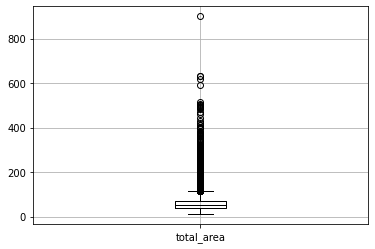

In [133]:
# построим диаграмму размаха
data.boxplot(column=['total_area'], grid=True , color='black') 

<AxesSubplot:>

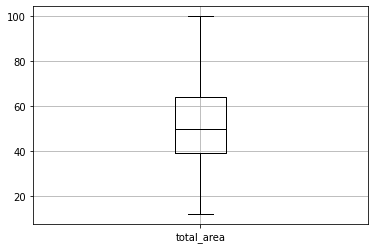

In [134]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('total_area <= 100').boxplot(column=['total_area'], grid=True , color='black') 

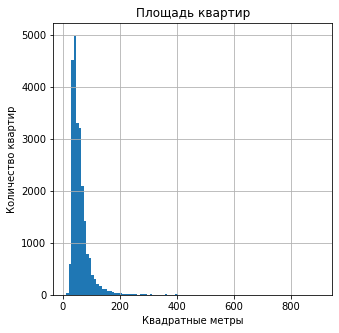

In [135]:
data['total_area'].hist(bins=100, grid=True, figsize=(5, 5))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

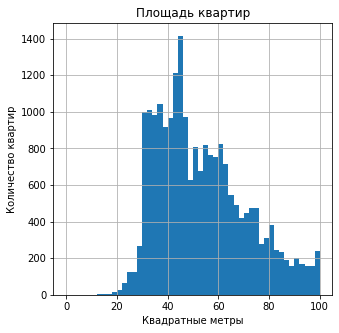

Объекты наибольшей площади:
19540    900
12859    631
3117     631
15651    618
5358     590
4237     517
8018     507
5893     500
15016    500
12401    495
Name: total_area, dtype: int64

Объекты наименьшей площади:
9412     16
8886     16
16949    15
12040    15
19642    14
19807    13
17961    13
19546    13
19558    13
19904    12
Name: total_area, dtype: int64


In [136]:
data['total_area'].hist(bins=50, grid=True, figsize=(5, 5), range=(0, 100))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Объекты наибольшей площади:')
print(data['total_area'].sort_values(ascending=False).head(10))
print()
print('Объекты наименьшей площади:')
print(data['total_area'].sort_values(ascending=False).tail(10))

In [137]:
data.loc[[19540]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,kilometers_distance_to_city_center,last_price_million,floor_type,index_floor_type
19540,8,420000000,900,2017-12-06,12,2.8,25,410,25,False,...,318.0,106,466666.67,2,12,2017,8.0,420.0,последний,3


In [138]:
# создадим таблицу для хранения данные общей площади за исключением выбросов 
filtered_total_area = data.query('total_area <= 100')
filtered_total_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,kilometers_distance_to_city_center,last_price_million,floor_type,index_floor_type
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,NaN,81,83750.00,1,12,2018,19.0,3.35,первый,1
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,574.0,558,92785.71,3,8,2015,14.0,5.20,другой,2
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,48.0,121,100000.00,1,6,2018,8.0,10.00,другой,2
5,10,2890000,30,2018-09-10,1,2.6,12,14,5,False,...,NaN,55,96333.33,0,9,2018,NaN,2.89,другой,2
6,6,3700000,37,2017-11-02,1,2.6,26,11,6,False,...,NaN,155,100000.00,3,11,2017,19.0,3.70,другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62,2016-08-05,3,2.6,9,40,8,False,...,675.0,239,74193.55,4,8,2016,34.0,4.60,другой,2
23695,14,3100000,59,2018-01-15,3,2.6,5,38,4,False,...,NaN,45,52542.37,0,1,2018,NaN,3.10,другой,2
23696,18,2500000,57,2018-02-11,2,2.6,3,30,1,False,...,NaN,0,43859.65,6,2,2018,NaN,2.50,первый,1
23697,13,11475000,77,2017-03-28,2,3.0,17,43,12,False,...,196.0,602,149025.97,1,3,2017,10.0,11.48,другой,2


###### Вывод

Основная масса квартир в продаже - площадью до 100 кв.м. Половина из них в диапазоне от 40 до 70 кв. м. Медианной площадью является 52 кв.м. 
В датафрейме много единичных объетов очень большой площади - 600-900 кв.м.

#### Жилая площадь

In [139]:
# смотрим числовое описание данных
data['living_area'].describe()

count    23498.000000
mean        34.528811
std         22.371643
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        410.000000
Name: living_area, dtype: float64

<AxesSubplot:>

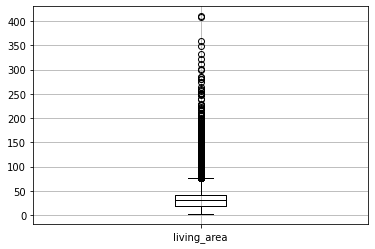

In [140]:
# построим диаграмму размаха
data.boxplot(column=['living_area'], grid=True , color='black') 

<AxesSubplot:>

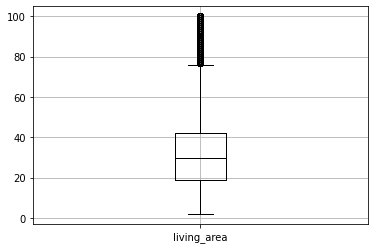

In [141]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('living_area <= 100').boxplot(column=['living_area'], grid=True , color='black') 

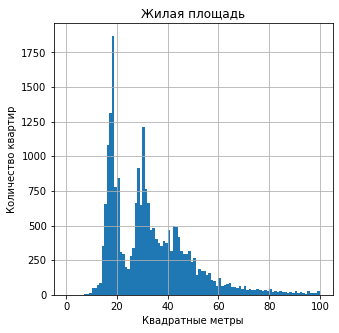

In [142]:
data['living_area'].hist(bins=100, grid=True, figsize=(5, 5), range=(0, 100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

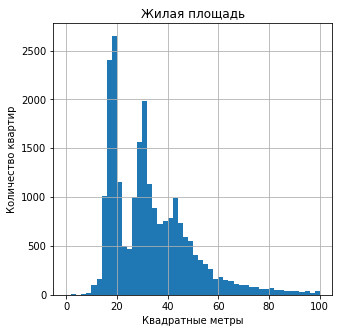

Объекты наибольшей жил.площади:
19540    410
5358     409
3117     360
12401    348
4237     332
12859    322
660      312
8018     302
14088    300
5893     285
Name: living_area, dtype: int64

Объекты наименьшей жил.площади:
19558    7
17961    7
19251    6
16431    6
21943    5
17582    5
3242     3
23574    3
21758    2
13915    2
Name: living_area, dtype: int64


In [143]:
data['living_area'].hist(bins=50, grid=True, figsize=(5, 5), range=(0, 100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Объекты наибольшей жил.площади:')
print(data['living_area'].sort_values(ascending=False).head(10))
print()
print('Объекты наименьшей жил.площади:')
print(data['living_area'].sort_values(ascending=False).tail(10))

In [144]:
# создадим таблицу для хранения данные общей площади за исключением выбросов 
filtered_living_area = data.query('living_area <= 80')
filtered_living_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,kilometers_distance_to_city_center,last_price_million,floor_type,index_floor_type
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,755.0,0,120370.37,3,3,2019,16.0,13.00,другой,2
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,NaN,81,83750.00,1,12,2018,19.0,3.35,первый,1
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,574.0,558,92785.71,3,8,2015,14.0,5.20,другой,2
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,48.0,121,100000.00,1,6,2018,8.0,10.00,другой,2
5,10,2890000,30,2018-09-10,1,2.6,12,14,5,False,...,NaN,55,96333.33,0,9,2018,NaN,2.89,другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,134,2017-03-21,3,3.7,5,73,3,False,...,381.0,0,72388.06,1,3,2017,4.0,9.70,другой,2
23695,14,3100000,59,2018-01-15,3,2.6,5,38,4,False,...,NaN,45,52542.37,0,1,2018,NaN,3.10,другой,2
23696,18,2500000,57,2018-02-11,2,2.6,3,30,1,False,...,NaN,0,43859.65,6,2,2018,NaN,2.50,первый,1
23697,13,11475000,77,2017-03-28,2,3.0,17,43,12,False,...,196.0,602,149025.97,1,3,2017,10.0,11.48,другой,2


###### Вывод

Основная масса продающихся квартир имеют жилую площадь до 80 кв.м. Половина приходится на диапазон 19-42квм. 
Медианное значение - 30 метров.

#### Площадь кухни

In [145]:
# смотрим числовое описание данных
data['kitchen_area'].describe()

count    23498.000000
mean        10.372159
std          6.075088
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

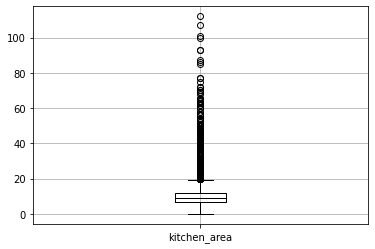

In [146]:
# построим диаграмму размаха
data.boxplot(column=['kitchen_area'], grid=True , color='black') 

<AxesSubplot:>

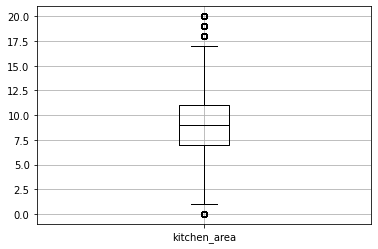

In [147]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('kitchen_area <= 20').boxplot(column=['kitchen_area'], grid=True , color='black') 

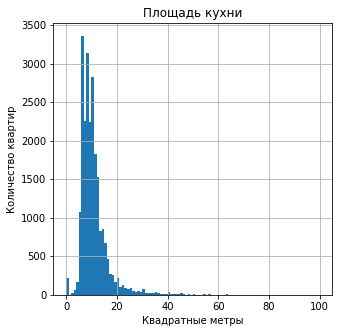

In [148]:
data['kitchen_area'].hist(bins=100, grid=True, figsize=(5, 5), range=(0, 100))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

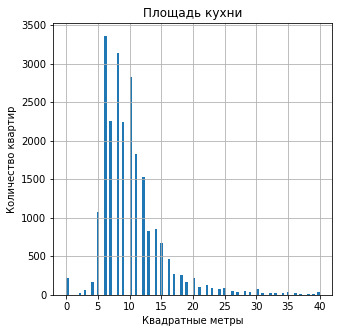

Кухни наибольшей площади:
19540    112
20215    107
2489     101
5358     100
16797     93
16239     93
10867     87
15016     86
9826      85
492       77
Name: kitchen_area, dtype: int64

Кухни наименьшей площади:
1574     0
839      0
16144    0
1277     0
17182    0
15606    0
1220     0
19469    0
349      0
20054    0
Name: kitchen_area, dtype: int64


In [149]:
data['kitchen_area'].hist(bins=100, grid=True, figsize=(5, 5), range=(0, 40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Кухни наибольшей площади:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
print()
print('Кухни наименьшей площади:')
print(data['kitchen_area'].sort_values(ascending=False).tail(10))

In [150]:
# создадим таблицу для хранения данные общей площади за исключением выбросов 
filtered_kitchen_area = data.query('kitchen_area <= 17')
filtered_kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,kilometers_distance_to_city_center,last_price_million,floor_type,index_floor_type
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,NaN,81,83750.00,1,12,2018,19.0,3.35,первый,1
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,574.0,558,92785.71,3,8,2015,14.0,5.20,другой,2
5,10,2890000,30,2018-09-10,1,2.6,12,14,5,False,...,NaN,55,96333.33,0,9,2018,NaN,2.89,другой,2
6,6,3700000,37,2017-11-02,1,2.6,26,11,6,False,...,NaN,155,100000.00,3,11,2017,19.0,3.70,другой,2
8,20,2900000,33,2018-05-23,1,2.6,27,15,26,False,...,NaN,189,87878.79,2,5,2018,NaN,2.90,другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62,2016-08-05,3,2.6,9,40,8,False,...,675.0,239,74193.55,4,8,2016,34.0,4.60,другой,2
23694,9,9700000,134,2017-03-21,3,3.7,5,73,3,False,...,381.0,0,72388.06,1,3,2017,4.0,9.70,другой,2
23695,14,3100000,59,2018-01-15,3,2.6,5,38,4,False,...,NaN,45,52542.37,0,1,2018,NaN,3.10,другой,2
23696,18,2500000,57,2018-02-11,2,2.6,3,30,1,False,...,NaN,0,43859.65,6,2,2018,NaN,2.50,первый,1


###### Вывод

Основная масса квартив в продаже имеют кухни от 2 до 17 кв м. Половина из них приходится на диапазон от 7 до 12 кв.м. Медианная, наиболее частотная площать кухни в продаваемых объемках 9 кв.м.

#### Цена объекта

In [151]:
# смотрим числовое описание данных
data['last_price'].describe()

count    2.349800e+04
mean     6.544323e+06
std      1.092529e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

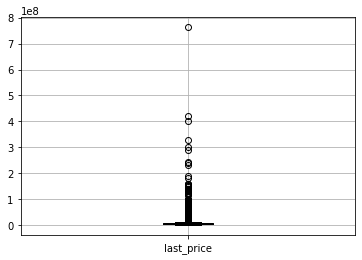

In [152]:
# построим диаграмму размаха
data.boxplot(column=['last_price'], grid=True , color='black') 

<AxesSubplot:>

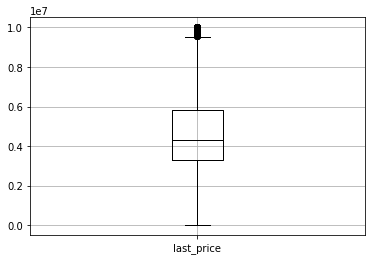

In [153]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('last_price <= 10_000_000').boxplot(column=['last_price'], grid=True , color='black') 

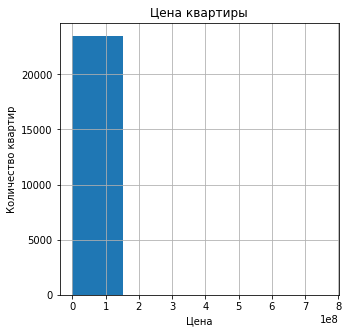

In [154]:
data['last_price'].hist(bins=5, grid=True, figsize=(5, 5))
plt.title('Цена квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

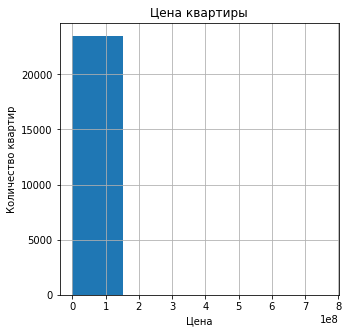

Наибольшая цена:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64

Наименьшая цена:
23484    470000
21912    470000
16219    450000
17676    450000
5698     450000
9581     450000
16274    440000
17456    430000
14911    430000
8793      12190
Name: last_price, dtype: int64


In [155]:
data['last_price'].hist(bins=5, grid=True, figsize=(5, 5))
plt.title('Цена квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшая цена:')
print(data['last_price'].sort_values(ascending=False).head(10))
print()
print('Наименьшая цена:')
print(data['last_price'].sort_values(ascending=False).tail(10))

###### Вывод

Основную массу продающихся квартир составляют объекты до 10 млн руб. Половина продающихся квартир стоят в диапазоне от 3,4 млн до 6,8 млн руб. Медианная цена - 4,6 млн руб. Присутствуют аномальные выбросы до 763 млн руб. 

#### Количество комнат

In [156]:
# смотрим числовое описание данных
data['rooms'].describe()

count    23498.000000
mean         2.070559
std          1.080239
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

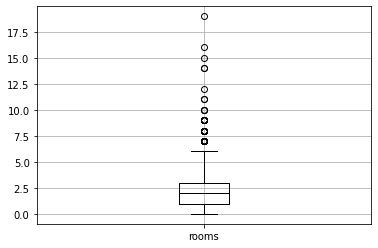

In [157]:
# построим диаграмму размаха
data.boxplot(column=['rooms'], grid=True , color='black') 

<AxesSubplot:>

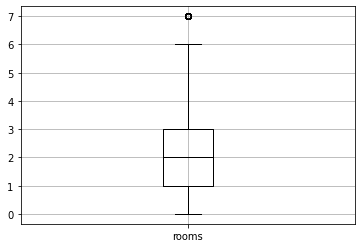

In [158]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('rooms <= 7').boxplot(column=['rooms'], grid=True , color='black') 

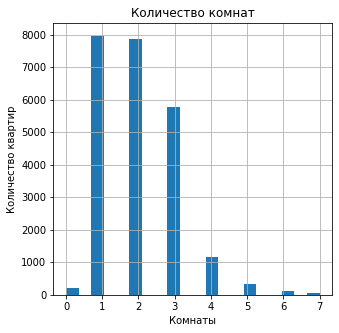

Наибольшее число комнат:
14498    19
18848    16
5358     15
866      14
20829    14
19540    12
648      11
9688     11
18119    10
4149     10
Name: rooms, dtype: int64

Наименьшее число комнат:
15569    0
19735    0
11331    0
6805     0
9817     0
608      0
15606    0
22521    0
8454     0
19469    0
Name: rooms, dtype: int64


In [159]:
data['rooms'].hist(bins=20, grid=True, figsize=(5, 5), range=(0,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее число комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))
print()
print('Наименьшее число комнат:')
print(data['rooms'].sort_values(ascending=False).tail(10))

In [160]:
# создадим таблицу для хранения данные общей площади за исключением выбросов - до 6 комнат
filtered_rooms = data.query('rooms <= 6')
filtered_rooms

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,kilometers_distance_to_city_center,last_price_million,floor_type,index_floor_type
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,False,...,755.0,0,120370.37,3,3,2019,16.0,13.00,другой,2
1,7,3350000,40,2018-12-04,1,2.6,11,19,1,False,...,NaN,81,83750.00,1,12,2018,19.0,3.35,первый,1
2,10,5196000,56,2015-08-20,2,2.6,5,34,4,False,...,574.0,558,92785.71,3,8,2015,14.0,5.20,другой,2
3,0,64900000,159,2015-07-24,3,2.6,14,90,9,False,...,234.0,424,408176.10,4,7,2015,7.0,64.90,другой,2
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,False,...,48.0,121,100000.00,1,6,2018,8.0,10.00,другой,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,134,2017-03-21,3,3.7,5,73,3,False,...,381.0,0,72388.06,1,3,2017,4.0,9.70,другой,2
23695,14,3100000,59,2018-01-15,3,2.6,5,38,4,False,...,NaN,45,52542.37,0,1,2018,NaN,3.10,другой,2
23696,18,2500000,57,2018-02-11,2,2.6,3,30,1,False,...,NaN,0,43859.65,6,2,2018,NaN,2.50,первый,1
23697,13,11475000,77,2017-03-28,2,3.0,17,43,12,False,...,196.0,602,149025.97,1,3,2017,10.0,11.48,другой,2


###### Вывод

Половина продающихся квартир имеют 1-3 комнаты. Больше всего объявлений приходится на 1-комнатные и 2-комнатные.
Максимальное количество комнат - 6. Аномально большое количеством комнат (от 7 до 19 комнат) больше пожеже на ошибки в данных, поэтому мы исключили их из отфильтрованой таблицы.

#### Высота потолков

In [161]:
# смотрим числовое описание данных
data['ceiling_height'].describe()

count    23498.000000
mean         2.690376
std          0.241841
min          2.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

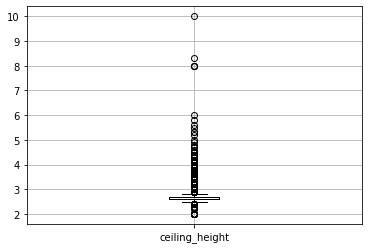

In [162]:
# построим диаграмму размаха
data.boxplot(column=['ceiling_height'], grid=True , color='black') 

<AxesSubplot:>

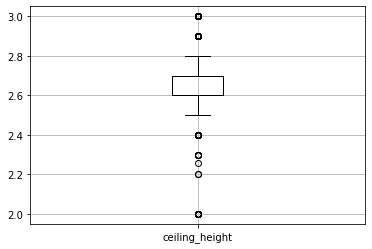

In [163]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('ceiling_height <= 3').boxplot(column=['ceiling_height'], grid=True , color='black') 

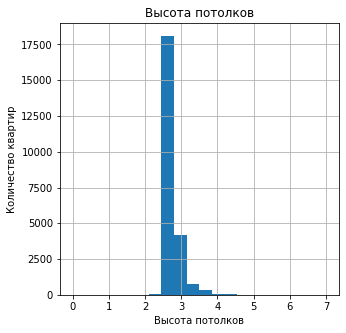

Наибольшая высота потолков:
22869    10.0
5863      8.3
17442     8.0
15743     8.0
3474      8.0
20264     6.0
21227     5.8
1388      5.6
7578      5.5
12628     5.3
Name: ceiling_height, dtype: float64

Наименьшая высота потолков:
552      2.0
22960    2.0
4212     2.0
11352    2.0
16884    2.0
19329    2.0
20520    2.0
2572     2.0
19098    2.0
16446    2.0
Name: ceiling_height, dtype: float64


In [164]:
data['ceiling_height'].hist(bins=20, grid=True, figsize=(5, 5), range=(0,7))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшая высота потолков:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
print()
print('Наименьшая высота потолков:')
print(data['ceiling_height'].sort_values(ascending=False).tail(10))

###### Вывод

Большинство продающихся квартир имеют стантартные потолки - от 2,5 до 2,8 м. Наиболее частотная, медианная высота - 2,6м.

#### Тип этажа квартиры

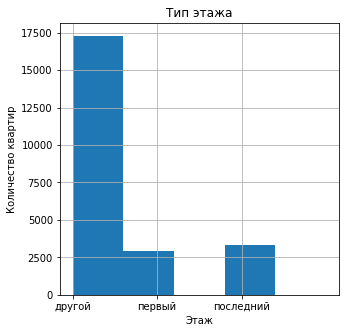

In [165]:
# Построим гистограмму

data['floor_type'].hist(bins=5, grid=True, figsize=(5, 5), range=(0,3))
plt.title('Тип этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

###### Вывод

Большинство квартир в продаже находятся не на первом и не на последнем этажах.

#### Общее количество этажей в доме

In [166]:
# смотрим числовое описание данных
data['floors_total'].describe()

count    23498.000000
mean        10.669206
std          6.588778
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

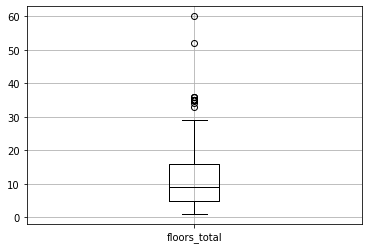

In [167]:
# построим диаграмму размаха
data.boxplot(column=['floors_total'], grid=True , color='black') 

<AxesSubplot:>

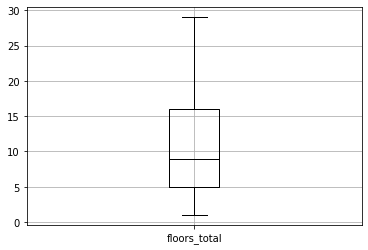

In [168]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('floors_total <= 30').boxplot(column=['floors_total'], grid=True , color='black') 

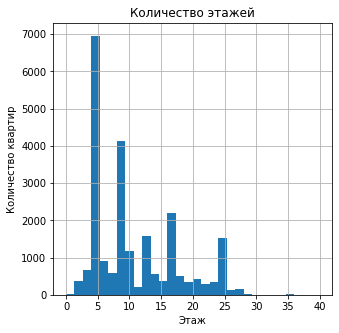

Наибольшее число этажей:
2253     60
16731    52
11079    36
5807     36
397      36
21599    35
20938    35
7236     35
18218    35
14347    35
Name: floors_total, dtype: int64

Наименьшее число этажей:
5300     1
11641    1
22550    1
18900    1
22855    1
21603    1
19590    1
15543    1
5698     1
11746    1
Name: floors_total, dtype: int64


In [169]:
data['floors_total'].hist(bins=30, grid=True, figsize=(5, 5), range=(0,40))
plt.title('Количество этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее число этажей:')
print(data['floors_total'].sort_values(ascending=False).head(10))
print()
print('Наименьшее число этажей:')
print(data['floors_total'].sort_values(ascending=False).tail(10))

###### Вывод

Половина продаваемых объектов находится в 5-16-этажных домах. Наиболее частотны среди объявлений 5-этажные дома, это видно на гистограмме. Объяснить такие показатели можно тем, что основу жилого фонда составляют панельные дома 60-70-х годов ("хрущевки"). 
9-этажные дома являются медианными в выборке.

#### Расстояние до центра города в метрах

In [170]:
# смотрим числовое описание данных
data['city_centers_nearest'].describe()

count    18087.000000
mean     14195.023470
std       8614.719536
min        181.000000
25%       9255.500000
50%      13073.000000
75%      16280.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

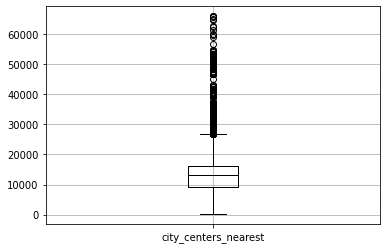

In [171]:
# построим диаграмму размаха
data.boxplot(column=['city_centers_nearest'], grid=True , color='black') 

<AxesSubplot:>

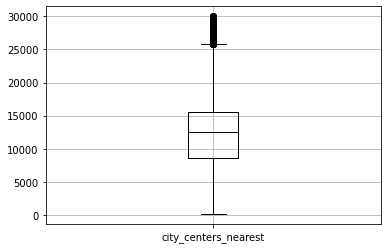

In [172]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('city_centers_nearest <= 30_000').boxplot(column=['city_centers_nearest'], grid=True , color='black') 

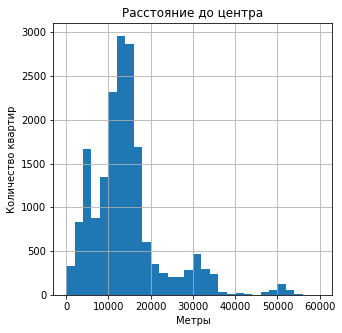

Наибольшее растояние:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: city_centers_nearest, dtype: float64

Наименьшее расстояние:
23666   NaN
23670   NaN
23677   NaN
23679   NaN
23682   NaN
23683   NaN
23692   NaN
23695   NaN
23696   NaN
23698   NaN
Name: city_centers_nearest, dtype: float64


In [173]:
data['city_centers_nearest'].hist(bins=30, grid=True, figsize=(5, 5), range=(0,60000))
plt.title('Расстояние до центра')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее растояние:')
print(data['city_centers_nearest'].sort_values(ascending=False).head(10))
print()
print('Наименьшее расстояние:')
print(data['city_centers_nearest'].sort_values(ascending=False).tail(10))

###### Вывод

Основная масса объектов (для которых указано расстояние до центра) находится на расстоянии до 27 км от центра города, в котором они находятся.

Половина продающихся квартир находятся на расстоянии 9,2 км до 16,2 км от центра. Медианная дистанция от центра города до объекта продажи - 13 км.

#### Расстояние до ближайшего парка

In [174]:
# смотрим числовое описание данных
data['parks_nearest'].describe()

count    8011.000000
mean      490.713893
std       341.166394
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

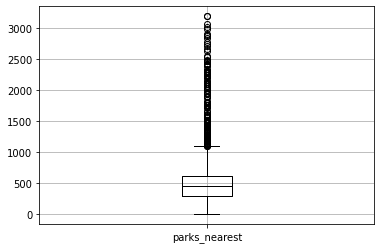

In [175]:
# построим диаграмму размаха
data.boxplot(column=['parks_nearest'], grid=True , color='black') 

<AxesSubplot:>

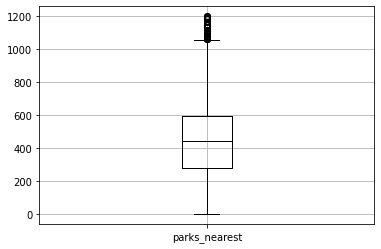

In [176]:
# отсечем максимальные выбросы и расмотрим диаграмму покрупнее 
data.query('parks_nearest <= 1200').boxplot(column=['parks_nearest'], grid=True , color='black') 

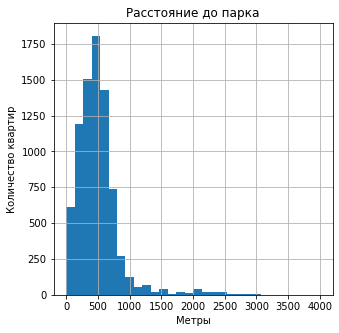

Наибольшее растояние:
19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

Наименьшее расстояние:
23683   NaN
23684   NaN
23685   NaN
23687   NaN
23688   NaN
23691   NaN
23692   NaN
23695   NaN
23696   NaN
23698   NaN
Name: parks_nearest, dtype: float64


In [177]:
data['parks_nearest'].hist(bins=30, grid=True, figsize=(5, 5), range=(0,4000))
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее растояние:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))
print()
print('Наименьшее расстояние:')
print(data['parks_nearest'].sort_values(ascending=False).tail(10))

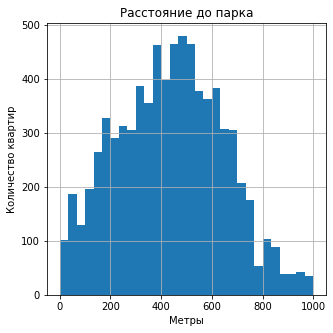

Наибольшее растояние:
19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

Наименьшее расстояние:
23683   NaN
23684   NaN
23685   NaN
23687   NaN
23688   NaN
23691   NaN
23692   NaN
23695   NaN
23696   NaN
23698   NaN
Name: parks_nearest, dtype: float64


In [178]:
data['parks_nearest'].hist(bins=30, grid=True, figsize=(5, 5), range=(0,1000))
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшее растояние:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))
print()
print('Наименьшее расстояние:')
print(data['parks_nearest'].sort_values(ascending=False).tail(10))

###### Вывод
Для большинства исследемых объектов (15 487) неуказано расстояние до ближайшего парка.  

Квартиры, для которых указано расстояние до парка, в основной массе находятся от парков примерно в 1050 метрах. У половины их этих квартир дистанция до парков - 288-612 метров. Медианное расстояние до парков - 455м.

#### Срок продажи объектов

In [179]:
# создадим таблицу, где отсечем срок ротации объявления раный нулю.

filtered_days_exposition = data.query('days_exposition > 0')

<AxesSubplot:>

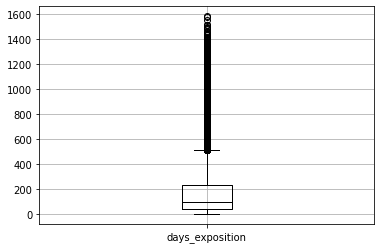

In [180]:
filtered_days_exposition.boxplot(column=['days_exposition'], grid=True , color='black') 

In [181]:
filtered_days_exposition['days_exposition'].describe()

count    20334.000000
mean       180.809826
std        219.813442
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим большое число выбросов примерно после 550 дней. Постороим гистограмму в диапазоне до 230 дней, чтобы рассмотреть график более делально.

<AxesSubplot:>

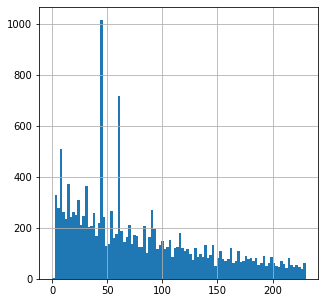

In [182]:
filtered_days_exposition['days_exposition'].hist(bins=100, grid=True, figsize=(5, 5), range=(0,230))

###### Вывод

Судя по графику обычно продажа квартиры занимает максимум до 550 дней. 
Продажу течении до 45 дней можно считать быстрой - всего 25% объектов реализуются в этот срок. 
Более вероятен срок продажи 95 дней (медианное значение) - выставляю квартиру на продажу нужно ориентироваться на этот срок.
75% квартир продаются до 230 дней, срок больше этого можно считать долгим. 

#### Факторы, влияющие на полную стоимость объекта

##### Общая площадь

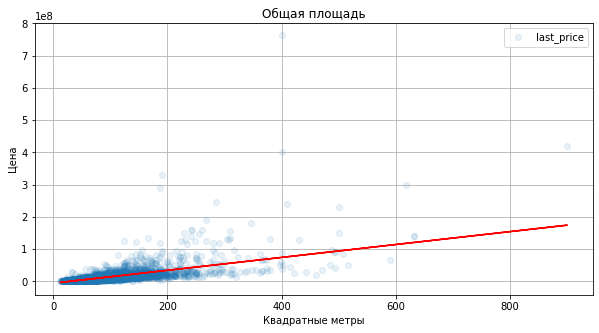

Корреляция цены и общей площади: 0.6536195963610942


In [183]:
# построим гистограмму и узнаем корреляцию по исходному датафрейму

#total_area_price_corr = filtered_total_area.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5))

data.plot(x='total_area', y='last_price', grid=True, style='o', alpha = 0.1, figsize=(10, 5))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')

#построим линию тренда
x = data['total_area']
y = data['last_price']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

print('Корреляция цены и общей площади:', \
data['total_area'].corr(data['last_price']))


###### Вывод
Корреляция цены и общей площади выше среднего (0,65). При увеличении площади квартиры увеличивается и стоимость.
До общей площади 100 кв.м. рост цены идет равномерно, почти без разброса цены. От 100 до 200 кв.м начинается разброс цены. После 200 кв.м тренд роста цену теряет четкость, разброс становится сильным.

##### Жилая площадь

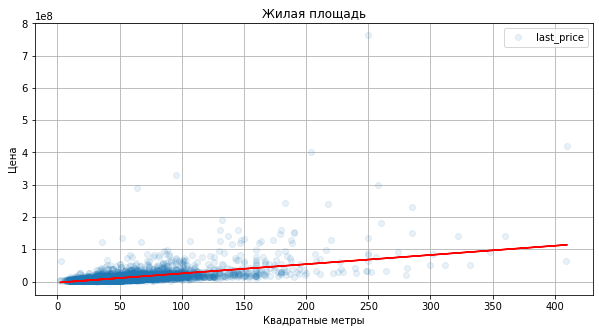

Корреляция цены и жилой площади: 0.585411418190608


In [184]:
# построим гистограмму и узнаем корреляцию по исходному датафрейму

#living_area_price_corr = filtered_living_area.pivot_table(index='living_area', values='last_price')\
#    .plot(grid=True, style='o', figsize=(10, 5))

data.plot(x='living_area', y='last_price', grid=True, style='o', alpha = 0.1, figsize=(10, 5))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')

#построим линию тренда
x = data['living_area']
y = data['last_price']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

print('Корреляция цены и жилой площади:', \
data['living_area'].corr(data['last_price']))

###### Вывод
Жилая площадь влияет на цену квартиры чуть меньше, чем общая площадь (корреляция 0,58). Жилая площадь до 30 кв.м.почти имеет расброса по цене. В диапазоне от 30 до 50 жилая площадь уже сильнее влияет на цену. Самый большой эффект на цену объекта оказывает жилая площадь более 50 кв.м. 

##### Площадь кухни

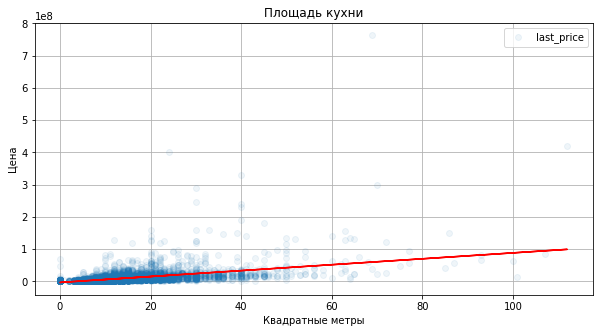

Корреляция цены и площади кухни: 0.5095080736478141


In [185]:
# построим гистограмму и узнаем корреляцию по исходному датафрейму

#kitchen_area_price_corr = filtered_kitchen_area.pivot_table(index='kitchen_area', values='last_price')\
#    .plot(grid=True, style='o-', figsize=(10, 5))

data.plot(x='kitchen_area', y='last_price', grid=True, style='o', alpha = 0.07, figsize=(10, 5))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')

#построим линию тренда
x = data['kitchen_area']
y = data['last_price']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

print('Корреляция цены и площади кухни:', \
data['kitchen_area'].corr(data['last_price']))

###### Вывод

Площадь кухни имеет среднюю корреляцию с ценой объекта недвижимости (0,50). С увеличение площади кухни в диапазоне от 5 до 11 кв.м. (стандартные кужни панельных домов) цена растет плавно, разброса цены почти нет. Примерно с 12 кв.м. и выше кухня оказывает еще более сильное влияние на цену, имеется большие выбросы цены - в этом случае речь очевидно идет про квартиры большой общей площади. 

##### Количества комнат

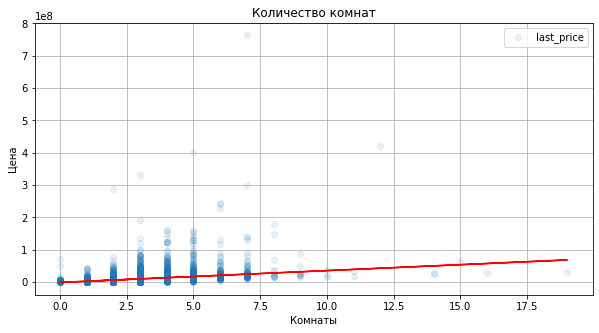

In [186]:
# построим гистограмму и узнаем корреляцию по исходному датафрейму

#rooms_price_corr = filtered_rooms.pivot_table(index='rooms', values='last_price')\
#    .plot(grid=True, style='o-', figsize=(10, 5))

data.plot(x='rooms', y='last_price', grid=True, style='o', alpha = 0.1, figsize=(10, 5))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Цена')

#построим линию тренда
x = data['rooms']
y = data['last_price']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
# print('Корреляция цены и количества комнат:', data['rooms'].corr(data['last_price']))

###### Вывод

С увеличением комнат в диапазоне 0 (студии) до 2 цена растет не сильно. Значительный рост цены начинается с 3 комнат и больше. При 4-6 комнатах в квартире наблюдается повышенный разброс цены.    

##### Тип этажа квартиры (первый, последний, другой)

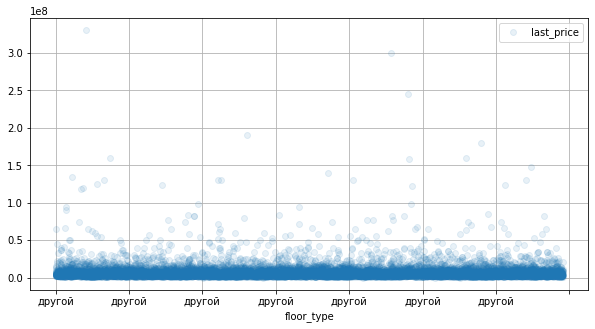

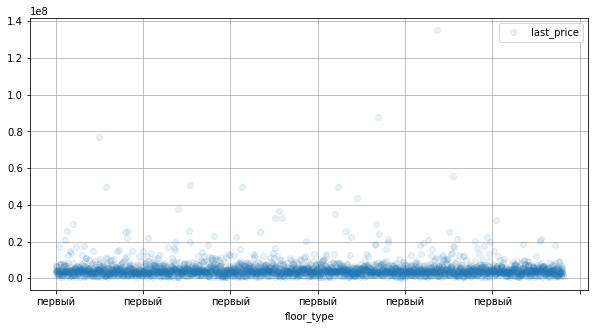

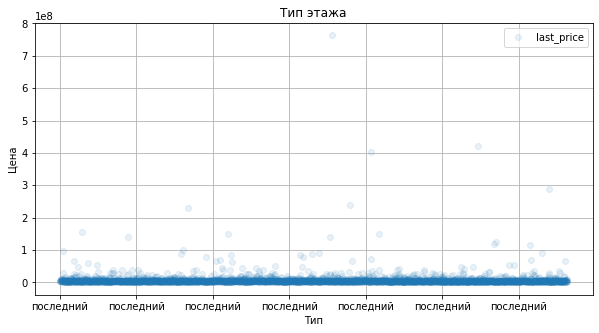

In [187]:
# построим гистограмму по исходному датафрейму

#floor_type_price_corr = data.pivot_table(index='floor_type', values='last_price')\
#    .plot(grid=True, style='o-', figsize=(10, 5))

data.groupby('floor_type').plot(x='floor_type', y='last_price', grid=True, style='o', alpha = 0.1, figsize=(10, 5))
plt.title('Тип этажа')
plt.xlabel('Тип')
plt.ylabel('Цена')         
plt.show()

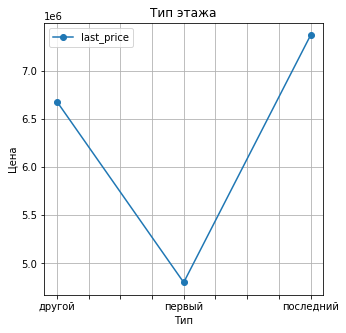

In [188]:
# построим гистограмму по исходному дата фрейму

data.pivot_table(index='floor_type', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Тип этажа')
plt.xlabel('Тип')
plt.ylabel('Цена')
plt.show()

По нему видно, что самые дешевые квартиры - на первых этажах. Самые дорогие - на последних. 
Однако такой результат последним этажам дают выбросы - очень дорогие объекты с аномально большой общей площадью (до 900 кв.м, ценой до 763 млн руб).

In [189]:
# data.pivot_table(index='floor_type', values=['total_area','last_price'], aggfunc=['max', 'mean', 'median'])

In [190]:
# data.pivot_table(index='floor', values=['index_floor_type','last_price']).corr()

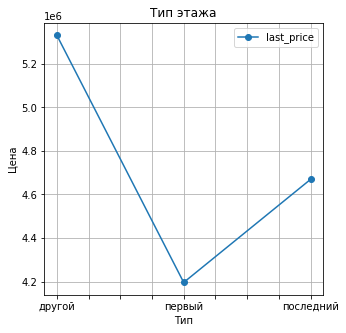

In [191]:
# построим гистограмму по таблице filtered_total_area,
# очишенной от выбросы по общей площади (т.к. в выбросах находились площаью от 200 до 900 кв.м.
# - такие объекты могли быть отдельными коттеджами или пентхаусами 

filtered_total_area.pivot_table(index='floor_type', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Тип этажа')
plt.xlabel('Тип')
plt.ylabel('Цена')

plt.show()

###### Вывод
На цену сильнее всего влияет расположение квартиры в середине дома, то есть не на первом и не на последнем этаже. 
Последий этаж увеличивает цену только в сегменте очень больших и дорогих квартир (вероятно пентхаусов).

##### Дата размещения объявлений (день недели, месяц, год)

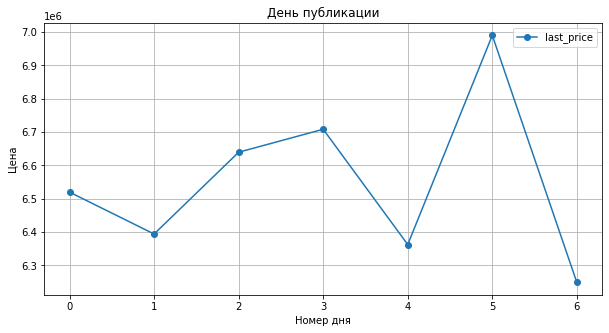

In [192]:
# Зависимость цены от дня размещения
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('День публикации')
plt.xlabel('Номер дня')
plt.ylabel('Цена')
plt.show()

# print('Корреляция цены и для размещения:')
# data.pivot_table(index='first_day_exposition', values=['weekday','last_price']).corr()

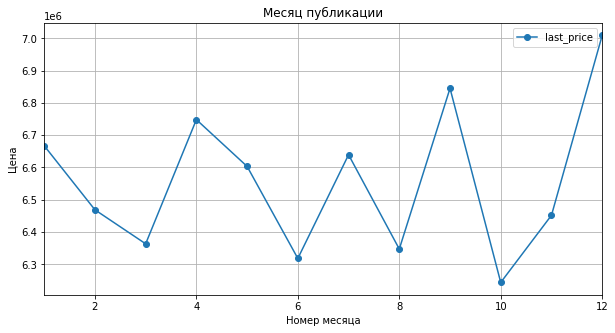

In [193]:
# Зависимость цены от месяца размещения
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.title('Месяц публикации')
plt.xlabel('Номер месяца')
plt.ylabel('Цена')
plt.show()

# print('Корреляция цены и месяца размещения:')
# data.pivot_table(index='first_day_exposition', values=['month','last_price']).corr()

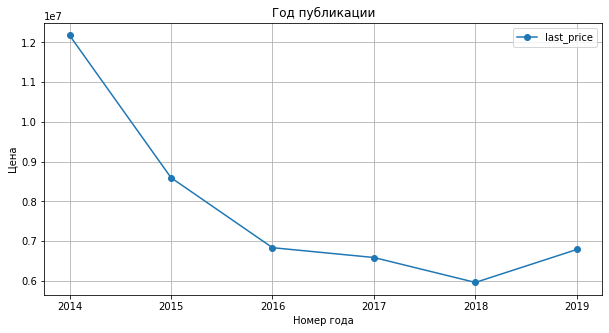

In [194]:
# Зависимость от года размещения
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Год публикации')
plt.xlabel('Номер года')
plt.ylabel('Цена')
plt.show()

# print('Корреляция цены и года размещения:')
# data.pivot_table(index='first_day_exposition', values=['year','last_price']).corr()

Связи между днем, месяцем и годом публикации объявления и ценой объекта недвижимости - нет. 

Цены объявлений размещенных в среду, четверг и субботу выше, чем объявления размещенные в другие дни. Но мы не стали бы говорить о том, что день размещения объявления напрямую увеличивает на цену квартиры.

Самые высокие цены в среднем у объявлений опубликованных в декабре. Также наблюдается тенденция: более высокие цены у объявлений обубликованных в начале квартала - январь, апрель, август.

Средняя цена объявлений за 4 последних года в выборке почти не отлчается год к году (разница в диапазоне примерно на 100 тыс). По сравнению с 2014 и 2015 годов цены в 2016-2019 годах снизились, что вероятно связано с кризисными явлениями в экономике и падением платежеспособного спроса.

#### Средняя цена кв.м. в ТОП-10 городах по числу объявлений

In [195]:
# составим список городов с наибольшим кол-вом объявлений
top_10_cities = data['locality_name'].value_counts().head(10)
top_10_cities

Санкт-Петербург    15610
Мурино               583
Кудрово              469
Шушары               438
Всеволожск           395
Пушкин               369
Колпино              337
Парголово            326
Гатчина              303
Выборг               237
Name: locality_name, dtype: int64

Больше всего квартир продается в Санкт-Петербурге - 15610 объявлений. В остальных города из ТОП-10 продается в 50 раз меньше квартир - от 237 до 583 объектов.     

In [196]:
# Построим сводную таблицу
top_10_cities = top_10_cities.index.values
top_10_cities_sale_price = data.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc='median')
top_10_cities_sale_price = top_10_cities_sale_price.query('locality_name in @top_10_cities').sort_values(by='price_one_square_meter', ascending=False)
top_10_cities_sale_price


,price_one_square_meter
locality_name,
Санкт-Петербург,104838.710
Пушкин,100000.000
Кудрово,95454.550
Парголово,91553.135
Мурино,85740.740
Шушары,76666.670
Колпино,74722.220
Гатчина,67241.380
Всеволожск,65686.270


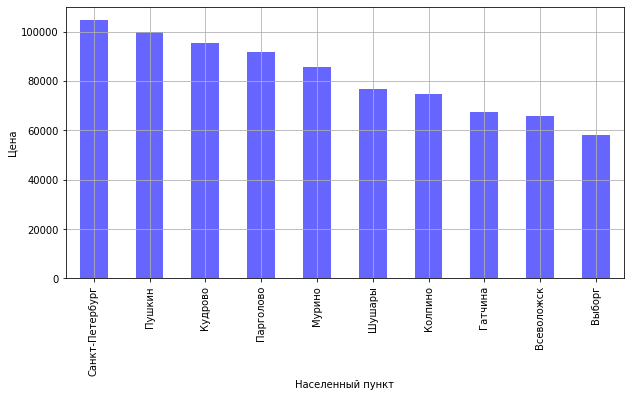

In [197]:
top_10_cities_sale_price.plot(y='price_one_square_meter', kind='bar', figsize=(10, 5), \
    legend=False, grid=True, color='blue', alpha=0.6)
plt.ylabel('Цена')
plt.xlabel('Населенный пункт')
plt.show()

Самые высокая цена квадратного метра - В Санкт-Петербурге (104,8 тыс руб). Также в первую тройку по цене квадратного метра входят город Пушкин - 100 тыс руб, и Кудрово = 95,5 тыс руб.

Ниже всего цена за кв.м. в Выборге - 58,1 тыс руб, что на 46% меньше, чем в СПБ.

#### Цены квартир в Санкт-Петербурге в зависимости от растояния до центра

In [198]:
# Выделим квартиры из СПБ, узнаем среднюю цену объектов по каждому километру до центра

price_spb_center_km = data.query('locality_name == "Санкт-Петербург"') \
    .pivot_table(index='kilometers_distance_to_city_center', values='last_price_million', aggfunc= 'mean')

# напечатаем среднюю цену квартир по километрам от центар Спб
price_spb_center_km

,last_price_million
kilometers_distance_to_city_center,
0.0,31.448889
1.0,21.206771
2.0,17.811942
3.0,11.137414
4.0,13.313493
5.0,14.463111
6.0,15.338430
7.0,14.800526
8.0,9.951130


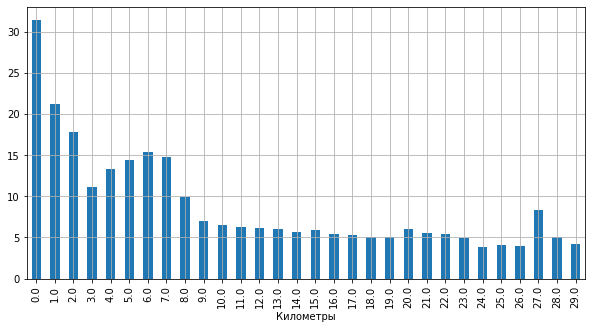

In [199]:
# Построим диаграмму распределения цены по километрам до центра

price_spb_center_km = price_spb_center_km.set_axis(['Цена за км'], axis='columns')
price_spb_center_km.plot(kind='bar', grid=True, legend=False, figsize=(10, 5))
plt.xlabel('Километры')
plt.show()

###### Вывод

Средняя цена квартир увеличивается с приближением к центру Санкт-Петербурга. 
Жилье в самом центре будет стоить в среднем 31,4 млн руб, в 1 км - 21,2 млн., в 2 км - 17,8 млн, в 5 км - 14,3 млн рублей. На расстоянии в 29 км квартиру можно купить примерно за 4,2 млн. руб.

Средняя цена неточно следует графику удаления от центра, есть всплески стоимости - например на дистанции в 6 км квартиры стоят дороже, чем на расстоянии 6 км. Вероятно это вызвано характеристиками жилья, расположенного на 6 км от центра. Возможно дома там большей площади. Но тенденция очевидна - чем дальше от центра, тем дешевле объекты недвижимости.

## Общий вывод по проекту

###### Обзор рынка

* Основная масса квартир в продаже - площадью до 100 кв.м. Половина из них в диапазоне от 40 до 70 кв. м. Медианной площадью является 52 кв.м. В датафрейме много единичных объектов очень большой площади - 600-900 кв.м.

* Основная масса продающихся квартир имеют жилую площадь до 80 кв.м. Половина приходится на диапазон 19-42квм. Медианное значение - 30 метров.

* Основная масса квартив в продаже имеют кухни от 2 до 17 кв м. Половина из них приходится на диапазон от 7 до 12 кв.м. Медианная, наиболее частотная площадь кухни в продаваемых объемках 9 кв.м.

* Основную массу продающихся квартир составляют объекты до 10 млн руб. Половина продающихся квартир стоят в диапазоне от 3,4 млн до 6,8 млн руб. Медианная цена - 4,6 млн руб. Присутствуют аномальные выбросы до 763 млн руб.

* Половина продающихся квартир имеют 1-3 комнаты. Больше всего объявлений приходится на 1-комнатные и 2-комнатные. Максимальное количество комнат - 6. Аномально большое количеством комнат (от 7 до 19 комнат) больше похоже на ошибки в данных.

* Большинство продающихся квартир имеют стандартные потолки - от 2,5 до 2,8 м. Наиболее частотная, медианная высота - 2,6м.

* Большинство квартир в продаже находятся не на первом и не на последнем этажах, а в середине дома.

* Половина продаваемых объектов находится в 5-16-этажных домах. Наиболее частотны среди объявлений 5-этажные дома, это видно на гистограмме. Объяснить такие показатели можно тем, что основу жилого фонда составляют панельные дома 60-70-х годов ("хрущевки"). 9-этажные дома являются медианными в выборке.

* Основная масса объектов (для которых указано расстояние до центра) находится на расстоянии до 27 км от центра города, в котором они находятся. Половина продающихся квартир находятся на расстоянии 9,2 км до 16,2 км от центра. Медианная дистанция от центра города до объекта продажи - 13 км.

* Судя по графику обычно продажа квартиры занимает максимум до 550 дней. Продажу течении до 45 дней можно считать быстрой - всего 25% объектов реализуются в этот срок. Более вероятен срок продажи 95 дней (медианное значение) - выставляю квартиру на продажу нужно ориентироваться на этот срок. 75% квартир продаются до 230 дней, срок больше этого можно считать долгим.


###### Срок продажи квартиры

* Судя по графику обычно продажа квартиры занимает максимум до 550 дней. Продажу течении до 45 дней можно считать быстрой - всего 25% объектов реализуются в этот срок. Более вероятен срок продажи 95 дней (медианное значение) - выставляю квартиру на продажу нужно ориентироваться на этот срок. 75% квартир продаются до 230 дней, срок больше этого можно считать долгим.

###### Факторы, влияющие на стоимость объектов

1) Корреляция цены и общей площади выше среднего (0,65). При увеличении площади квартиры увеличивается и стоимость. До общей площади 100 кв.м. рост цены идет равномерно, почти без разброса цены. От 100 до 200 кв.м начинается разброс цены. После 200 кв.м тренд роста цену теряет четкость, разброс становится сильным.
2) Жилая площадь влияет на цену квартиры чуть меньше, чем общая площадь (корреляция 0,58). Жилая площадь до 30 кв.м.почти имеет расброса по цене. В диапазоне от 30 до 50 жилая площадь уже сильнее влияет на цену. Самый большой эффект на цену объекта оказывает жилая площадь более 50 кв.м.
3) Площадь кухни имеет среднюю корреляцию с ценой объекта недвижимости (0,50). С увеличение площади кухни в диапазоне от 5 до 11 кв.м. (стандартные кухни панельных домов) цена растет плавно, разброса цены почти нет. Примерно с 12 кв.м. и выше кухня оказывает еще более сильное влияние на цену, имеется большие выбросы цены - в этом случае речь очевидно идет про квартиры большой общей площади.
* С увеличением комнат в диапазоне 0 (студии) до 2 цена растет не сильно. Значительный рост цены начинается с 3 комнат и больше. При 4-6 комнатах в квартире наблюдается повышенный разброс цены.
* На цену сильнее всего влияет расположение квартиры в середине дома, то есть не на первом и не на последнем этаже. Последий этаж увеличивает цену только в сегменте очень больших и дорогих квартир (вероятно пентхаусов).
* Связи между днем, месяцем и годом публикации объявления и ценой объекта недвижимости - нет.
Цены объявлений размещенных в среду, четверг и субботу выше, чем объявления размещенные в другие дни. Но мы не стали бы говорить о том, что день размещения объявления напрямую увеличивает на цену квартиры.
Самые высокие цены в среднем у объявлений опубликованных в декабре. Также наблюдается тенденция: более высокие цены у объявлений обубликованных в начале квартала - январь, апрель, август.
Средняя цена объявлений за 4 последних года в выборке почти не отлчается год к году (разница в диапазоне примерно на 100 тыс). По сравнению с 2014 и 2015 годов цены в 2016-2019 годах снизились, что вероятно связано с кризисными явлениями в экономике и падением платежеспособного спроса.


###### Стоимость квадратного метра в топ-10 населённых пунктов
* Больше всего квартир продается в Санкт-Петербурге - 15610 объявлений. В остальных города из ТОП-10 продается в 50 раз меньше квартир - от 237 до 583 объектов.

* Самые высокая цена квадратного метра - В Санкт-Петербурге (104,8 тыс руб). Также в первую тройку по цене квадратного метра входят город Пушкин - 100 тыс руб, и Кудрово = 95,5 тыс руб. Ниже всего цена за кв.м. в Выборге - 58,1 тыс руб, что на 46% меньше, чем в СПБ.


###### Цены квартир в Санкт-Петербурге в зависимости от растояния до центра
* Средняя цена квартир увеличивается с приближением к центру Санкт-Петербурга. Жилье в самом центре будет стоить в среднем 31,4 млн руб, в 1 км - 21,2 млн., в 2 км - 17,8 млн, в 5 км - 14,3 млн рублей. На расстоянии в 29 км квартиру можно купить примерно за 4,2 млн. руб.

* Средняя цена неточно следует графику удаления от центра, есть всплески стоимости - например на дистанции в 6 км квартиры стоят дороже, чем на расстоянии 6 км. Вероятно это вызвано характеристиками жилья, расположенного на 6 км от центра. Возможно дома там большей площади. Но тенденция очевидна - чем дальше от центра, тем дешевле объекты недвижимости.

###### Рекомендации для дальнейшего исследования
1) Устранить причину пропусков и наладить качественный  колонках airports_nearest, city_centers_nearest, parks_around_3000, arks_nearest, onds_around_3000, ponds_nearest. Обратить внимание на выбросы в данных - например площадь квартир более 600 кв.м.
2) Можно попробовать проанализировать рынок по сегментам. Например, выделить сегменты по расстоянию от центра города - 0-5 км, 6-10 км, 11- 15 км, 16-20 км, 21-25 км, более 26 км - и проанализировать какие факторы влияют на цену внутри этих сегментов (площадь, число комнат, высота потолков), и есть ли отличия в поведении этих факторов.
3) Также можно катергоризировать объекты недвижимоси по высотности домов (до 5 этажей ("хрущевки"), 6-9 этажей, 10 - 15 этажей, 16 и более) или проанализировать объекты по населенных пунктам - отдельно Спб, Пушкин, Выборг и тд.